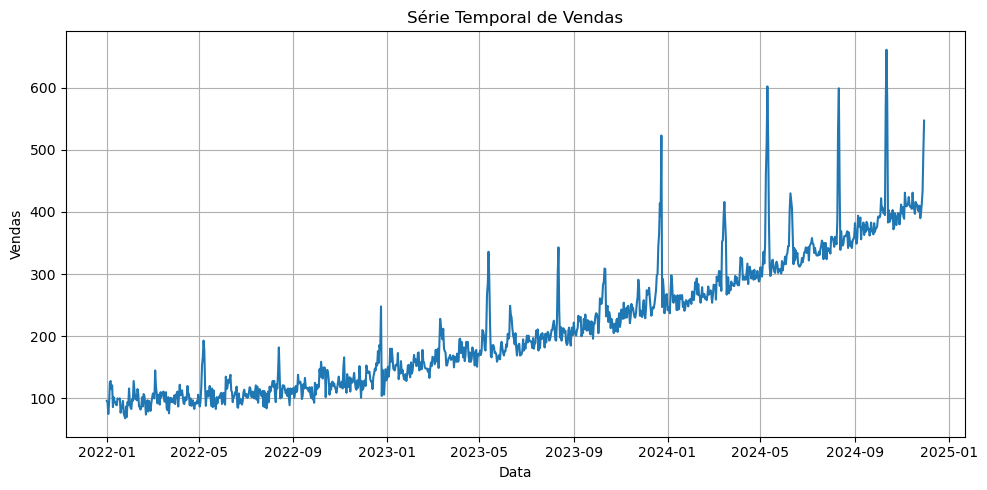

In [220]:
import pandas as pd
import matplotlib.pyplot as plt

# Caminho do arquivo
caminho_arquivo = r"C:\Users\andre\OneDrive\Área de Trabalho\Análise Preditiva\Dataset.xlsx"

# Lê o Excel e já converte a coluna 'datas' para datetime
df = pd.read_excel(caminho_arquivo, parse_dates=["datas"])

# Ordena os dados por data
df.sort_values("datas", inplace=True)

# Garante que o índice seja a data (opcional, mas útil para séries temporais)
df.set_index("datas", inplace=True)

# ----------------------------------------
# 1. Série temporal com as vendas
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["vendas"])
plt.title("Série Temporal de Vendas")
plt.xlabel("Data")
plt.ylabel("Vendas")
plt.grid(True)
plt.tight_layout()
plt.show()


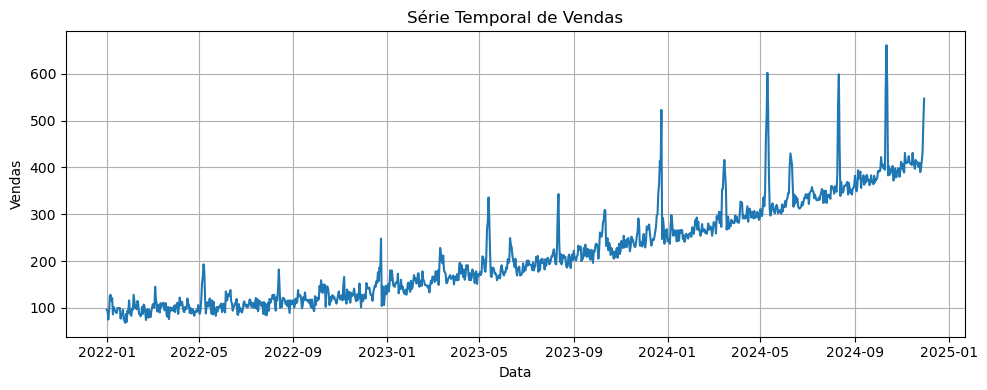

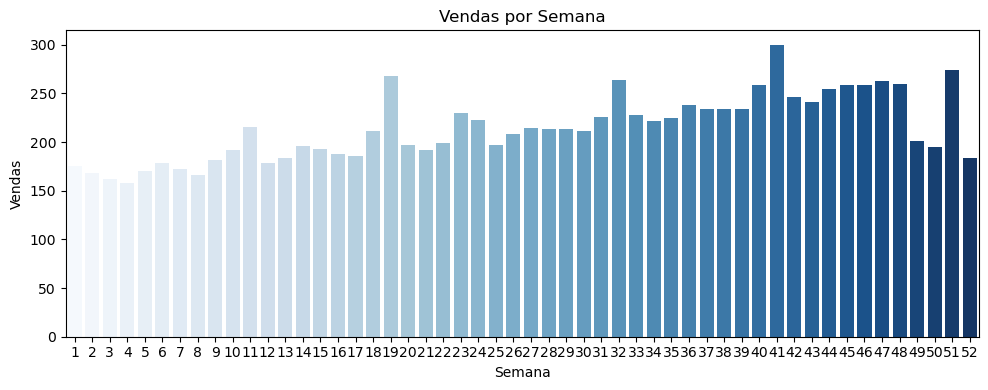

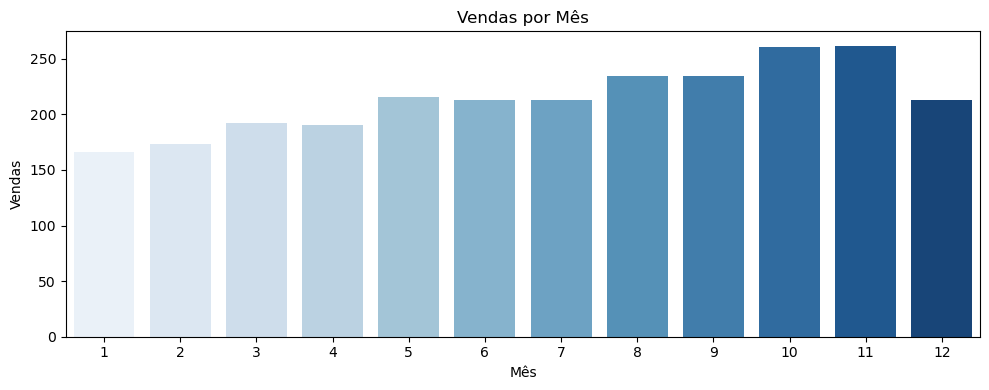

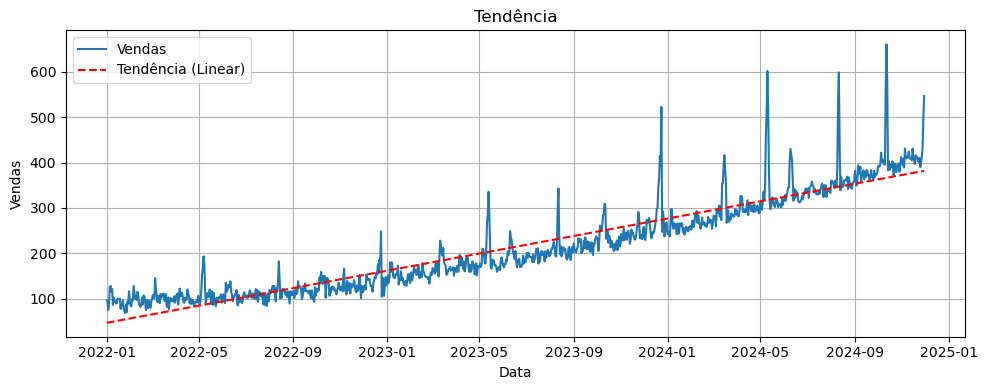

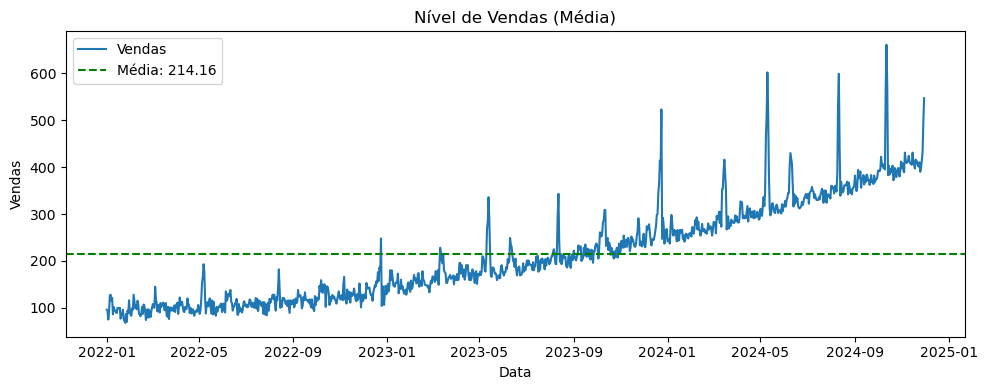

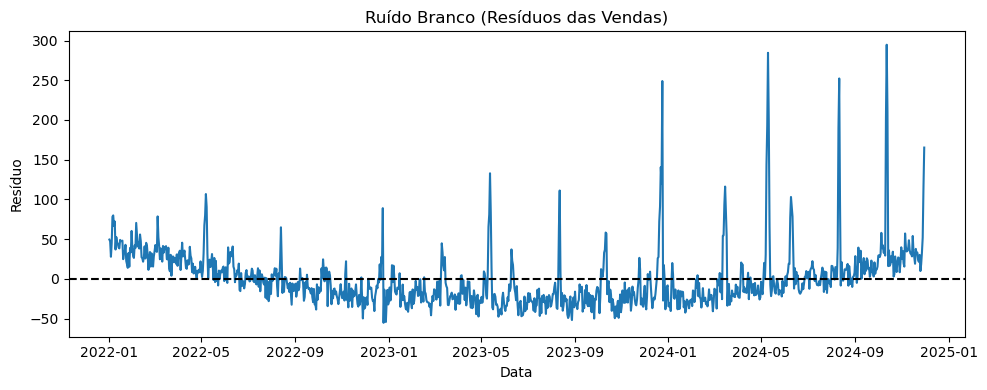

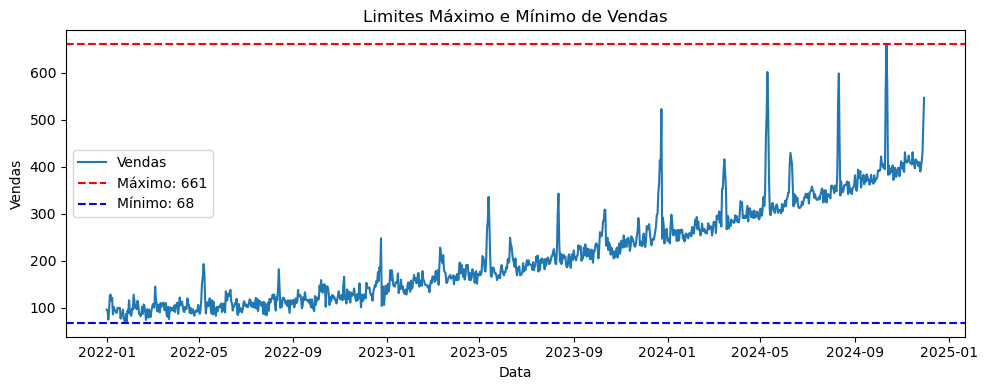

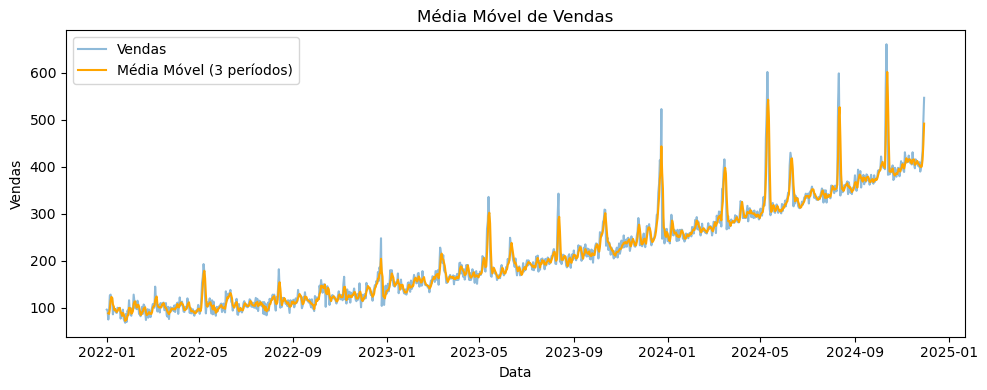

Média das vendas: 214.16
Desvio padrão das vendas: 103.57
Valor máximo: 661.00
Valor mínimo: 68.00


,Média das Vendas,Desvio Padrão,Valor Máximo,Valor Mínimo
0,214.16,103.57,661,68


In [221]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Caminho do arquivo Excel
caminho_arquivo = r"C:\Users\andre\OneDrive\Área de Trabalho\Análise Preditiva\Dataset.xlsx"

# Lê o Excel com conversão automática da coluna 'datas' para datetime
df = pd.read_excel(caminho_arquivo, parse_dates=["datas"])

# Ordena os dados por data
df.sort_values("datas", inplace=True)

# Define a coluna de datas como índice
df.set_index("datas", inplace=True)

# Cria colunas auxiliares para análise semanal e mensal
df["semana"] = df.index.isocalendar().week
df["mes"] = df.index.month

# ------------------ GRÁFICO 1: Série Temporal ------------------
plt.figure(figsize=(10, 4))
plt.plot(df.index, df["vendas"])
plt.title("Série Temporal de Vendas")
plt.xlabel("Data")
plt.ylabel("Vendas")
plt.grid(True)
plt.tight_layout()
plt.show()

# ------------------ GRÁFICO 2: Vendas por Semana ------------------
plt.figure(figsize=(10, 4))
sns.barplot(x="semana", y="vendas", data=df, ci=None, palette="Blues")
plt.title("Vendas por Semana")
plt.xlabel("Semana")
plt.ylabel("Vendas")
plt.tight_layout()
plt.show()

# ------------------ GRÁFICO 3: Vendas por Mês ------------------
plt.figure(figsize=(10, 4))
sns.barplot(x="mes", y="vendas", data=df, ci=None, palette="Blues")
plt.title("Vendas por Mês")
plt.xlabel("Mês")
plt.ylabel("Vendas")
plt.tight_layout()
plt.show()

# ------------------ GRÁFICO 4: Tendência (Regressão Linear) ------------------
from sklearn.linear_model import LinearRegression

# Cria uma coluna numérica representando o tempo (dias)
df["tempo"] = np.arange(len(df))

# Ajusta um modelo de regressão
X = df["tempo"].values.reshape(-1, 1)
y = df["vendas"].values
modelo = LinearRegression()
modelo.fit(X, y)
tendencia = modelo.predict(X)

plt.figure(figsize=(10, 4))
plt.plot(df.index, df["vendas"], label="Vendas")
plt.plot(df.index, tendencia, label="Tendência (Linear)", color="red", linestyle="--")
plt.title("Tendência")
plt.xlabel("Data")
plt.ylabel("Vendas")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ------------------ GRÁFICO 5: Nível Médio de Vendas ------------------
media_geral = df["vendas"].mean()

plt.figure(figsize=(10, 4))
plt.plot(df.index, df["vendas"], label="Vendas")
plt.axhline(media_geral, color="green", linestyle="--", label=f"Média: {media_geral:.2f}")
plt.title("Nível de Vendas (Média)")
plt.xlabel("Data")
plt.ylabel("Vendas")
plt.legend()
plt.tight_layout()
plt.show()

# ------------------ GRÁFICO 6: Ruído Branco (vendas - tendência) ------------------
residuos = df["vendas"] - tendencia

plt.figure(figsize=(10, 4))
plt.plot(df.index, residuos)
plt.title("Ruído Branco (Resíduos das Vendas)")
plt.axhline(0, color="black", linestyle="--")
plt.xlabel("Data")
plt.ylabel("Resíduo")
plt.tight_layout()
plt.show()

# ------------------ GRÁFICO 7: Limites Máximo e Mínimo ------------------
maximo = df["vendas"].max()
minimo = df["vendas"].min()

plt.figure(figsize=(10, 4))
plt.plot(df.index, df["vendas"], label="Vendas")
plt.axhline(maximo, color="red", linestyle="--", label=f"Máximo: {maximo}")
plt.axhline(minimo, color="blue", linestyle="--", label=f"Mínimo: {minimo}")
plt.title("Limites Máximo e Mínimo de Vendas")
plt.xlabel("Data")
plt.ylabel("Vendas")
plt.legend()
plt.tight_layout()
plt.show()

# ------------------ GRÁFICO 8: Média Móvel ------------------
df["media_movel"] = df["vendas"].rolling(window=3).mean()

plt.figure(figsize=(10, 4))
plt.plot(df.index, df["vendas"], label="Vendas", alpha=0.5)
plt.plot(df.index, df["media_movel"], label="Média Móvel (3 períodos)", color="orange")
plt.title("Média Móvel de Vendas")
plt.xlabel("Data")
plt.ylabel("Vendas")
plt.legend()
plt.tight_layout()
plt.show()

# ------------------ MÉTRICAS ESTATÍSTICAS ------------------
print(f"Média das vendas: {df['vendas'].mean():.2f}")
print(f"Desvio padrão das vendas: {df['vendas'].std():.2f}")
print(f"Valor máximo: {df['vendas'].max():.2f}")
print(f"Valor mínimo: {df['vendas'].min():.2f}")


# ------------------ MÉTRICAS ESTATÍSTICAS ------------------

metricas = {
    "Média das Vendas": [round(df['vendas'].mean(), 2)],
    "Desvio Padrão": [round(df['vendas'].std(), 2)],
    "Valor Máximo": [round(df['vendas'].max(), 2)],
    "Valor Mínimo": [round(df['vendas'].min(), 2)]
}

# Conversão para DataFrame
metricas_df = pd.DataFrame(metricas)

# Exibição da tabela de métricas
metricas_df


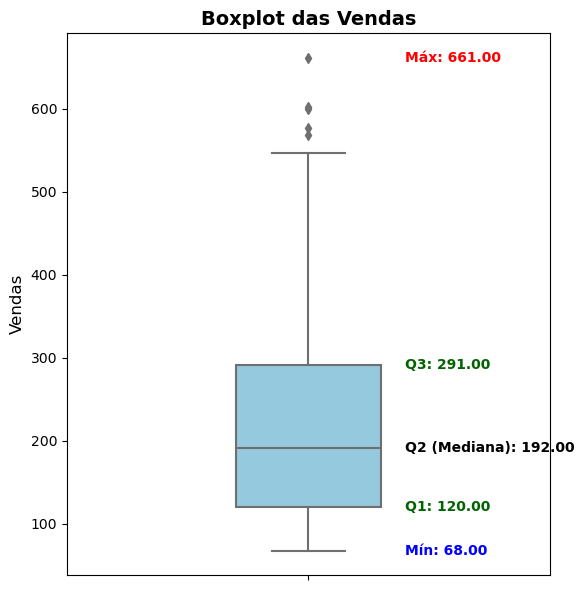

In [222]:
# ------------------ GRÁFICO 9: Boxplot com estatísticas descritivas ------------------
plt.figure(figsize=(6, 6))
sns.boxplot(y=df["vendas"], color="skyblue", width=0.3)
plt.title("Boxplot das Vendas", fontsize=14, fontweight='bold')
plt.ylabel("Vendas", fontsize=12)

# Estatísticas principais
q1 = df["vendas"].quantile(0.25)
q2 = df["vendas"].median()
q3 = df["vendas"].quantile(0.75)
minimo = df["vendas"].min()
maximo = df["vendas"].max()

# Coordenada horizontal para o texto à direita do boxplot
x_text = 0.2

# Anotações com alinhamento à direita e fonte estilizada
plt.text(x_text, minimo, f'Mín: {minimo:.2f}', va='center', ha='left', fontsize=10, fontweight='bold', color='blue')
plt.text(x_text, q1, f'Q1: {q1:.2f}', va='center', ha='left', fontsize=10, fontweight='bold', color='darkgreen')
plt.text(x_text, q2, f'Q2 (Mediana): {q2:.2f}', va='center', ha='left', fontsize=10, fontweight='bold', color='black')
plt.text(x_text, q3, f'Q3: {q3:.2f}', va='center', ha='left', fontsize=10, fontweight='bold', color='darkgreen')
plt.text(x_text, maximo, f'Máx: {maximo:.2f}', va='center', ha='left', fontsize=10, fontweight='bold', color='red')

plt.tight_layout()
plt.show()

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

# Carregar os dados
df = pd.read_excel("C:\\Users\\andre\\OneDrive\\Área de Trabalho\\Análise Preditiva\\Dataset.xlsx")

# Preparar a base
df['datas'] = pd.to_datetime(df['datas'])
df = df.sort_values('datas')
df.set_index('datas', inplace=True)

# Filtrar apenas os dados antes de dezembro/2024 para treinamento
df_train = df[df.index < '2024-11-30']

# Gerar o período futuro (dezembro de 2024)
futuro = pd.date_range(start='2024-12-01', end='2024-12-31', freq='D')


In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns

# Leitura dos dados
caminho_arquivo = "C:/Users/andre/OneDrive/Área de Trabalho/Análise Preditiva/Dataset.xlsx"
df = pd.read_excel(caminho_arquivo)

# Pré-processamento
df['datas'] = pd.to_datetime(df['datas'])
df.set_index('datas', inplace=True)
df = df.asfreq('D')
vendas = df['vendas']

# Definindo o horizonte de previsão para dezembro de 2024
inicio_previsao = pd.to_datetime("2024-12-01")
fim_previsao = pd.to_datetime("2024-12-31")
periodo_previsao = pd.date_range(start=inicio_previsao, end=fim_previsao, freq='D')
n_periodos = len(periodo_previsao)

# Funções de erro
def calcular_erros(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mad = mean_absolute_error(y_true, y_pred)
    erro_padrao = np.std(y_true - y_pred)
    r2 = r2_score(y_true, y_pred)
    
    return {'MAPE': mape, 'RMSE': rmse, 'MAD': mad, 'Erro Padrão': erro_padrao, 'R2': r2}

# Plotagem
def plot_forecasts(nome, real, previsto, futuro, ultimos=False):
    plt.figure(figsize=(14, 5))
    if ultimos:
        real = real[real.index >= real.index[-90]]
        previsto = previsto[previsto.index >= real.index[0]]
    plt.plot(real, label='Vendas Reais', color='black')
    plt.plot(previsto, label='Previsão Interna', color='blue')
    plt.plot(futuro, '--', color='red', label='Previsão Dezembro')
    plt.title(f'{nome} - {"Últimos Meses" if ultimos else "Histórico Completo"}')
    plt.xlabel("Data")
    plt.ylabel("Vendas")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Armazenar previsões e erros
resultados = {}

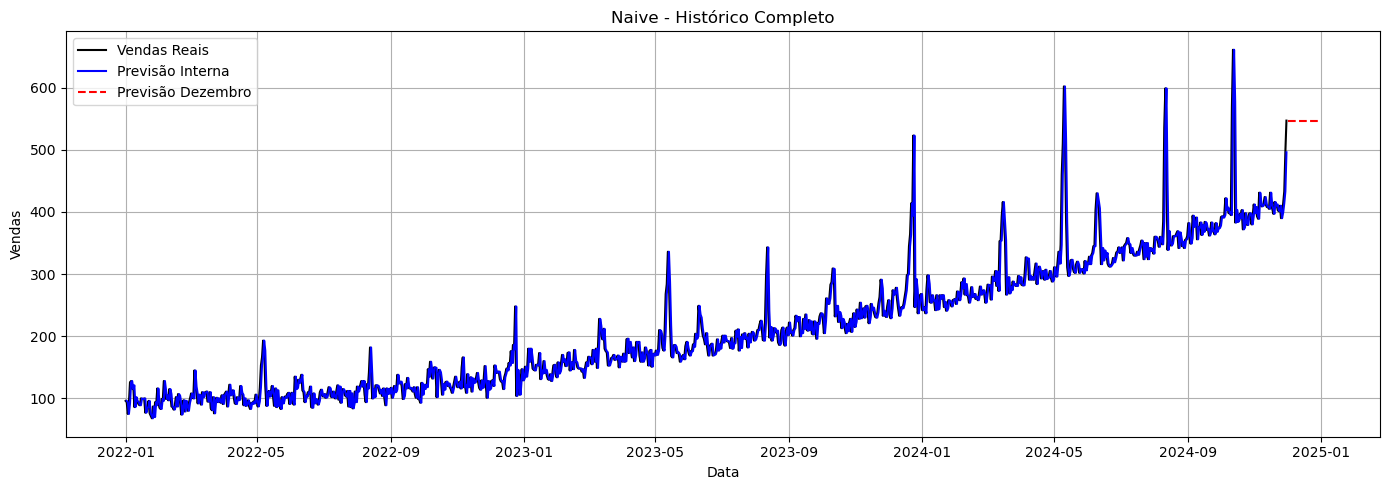

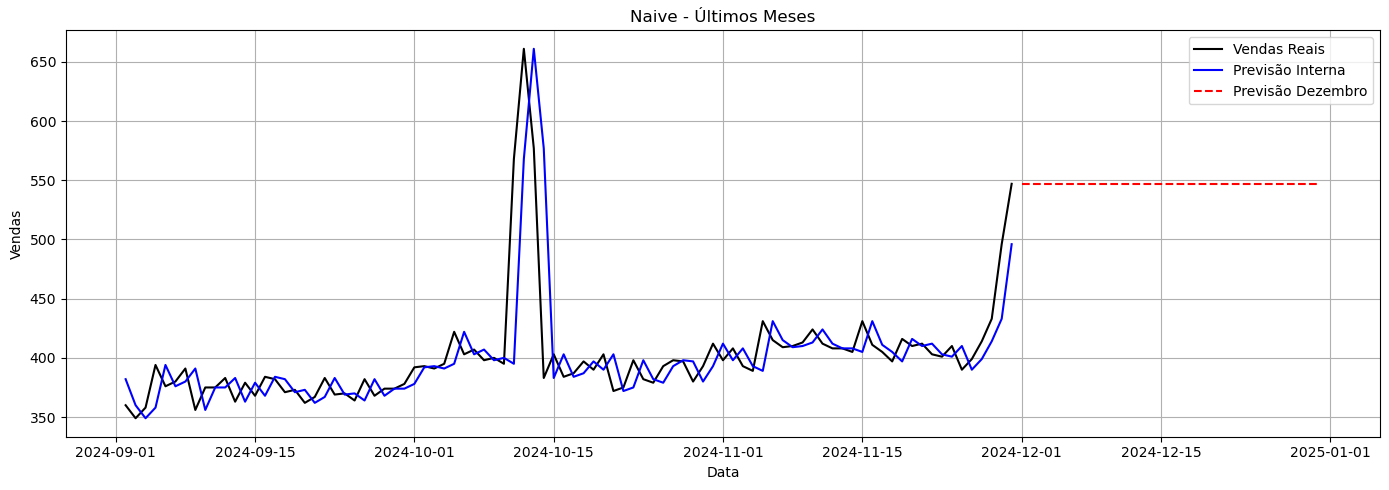

In [225]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Modelo 1 - Naive
naive_previsto = pd.Series(vendas.shift(1), index=vendas.index)
naive_futuro = pd.Series([vendas.iloc[-1]] * n_periodos, index=periodo_previsao)
erros_naive = calcular_erros(vendas[1:], naive_previsto[1:])
resultados['Naive'] = erros_naive
plot_forecasts("Naive", vendas, naive_previsto, naive_futuro, ultimos=False)
plot_forecasts("Naive", vendas, naive_previsto, naive_futuro, ultimos=True)

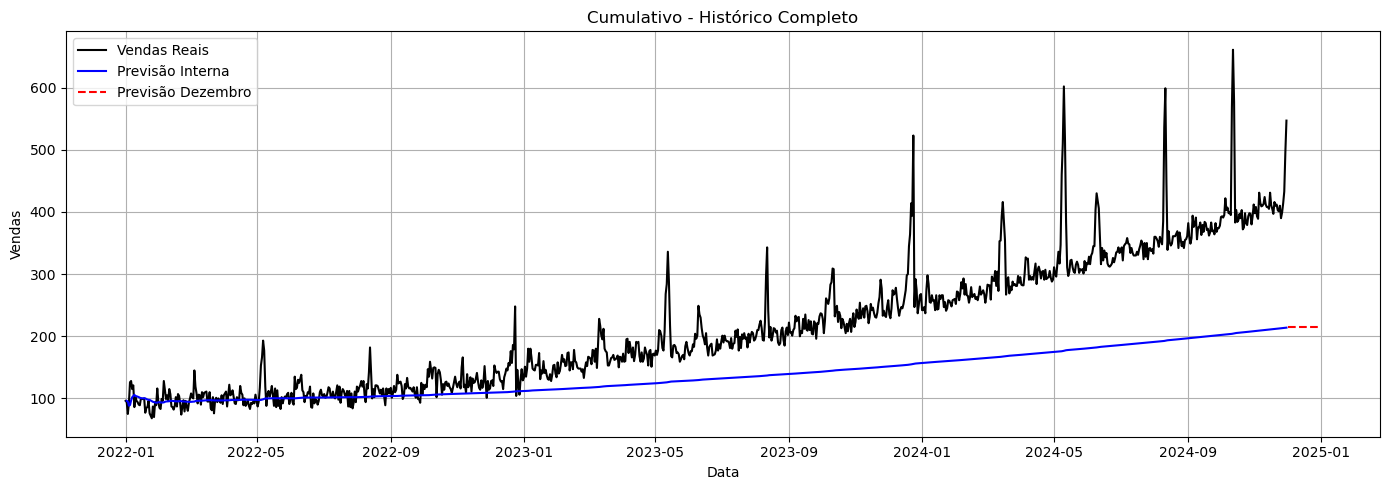

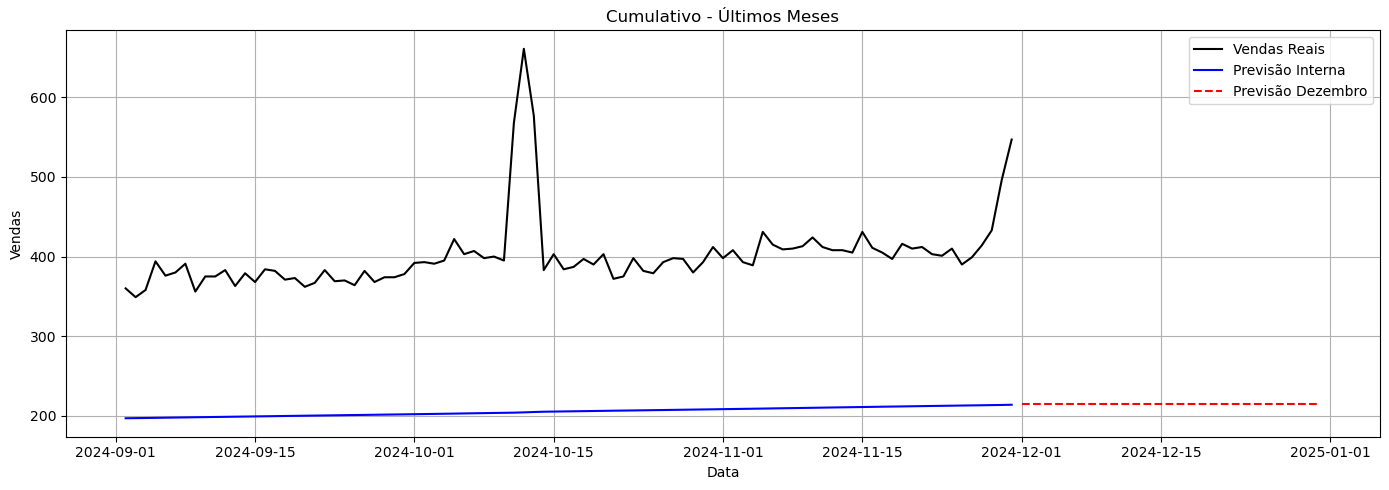

In [226]:
# Modelo 2 - Cumulativo
cumulativo_previsto = vendas.expanding().mean().shift(1)
cumulativo_futuro = pd.Series(vendas.mean(), index=periodo_previsao)
erros_cumulativo = calcular_erros(vendas[1:], cumulativo_previsto[1:])
resultados['Cumulativo'] = erros_cumulativo
plot_forecasts("Cumulativo", vendas, cumulativo_previsto, cumulativo_futuro, ultimos=False)
plot_forecasts("Cumulativo", vendas, cumulativo_previsto, cumulativo_futuro, ultimos=True)

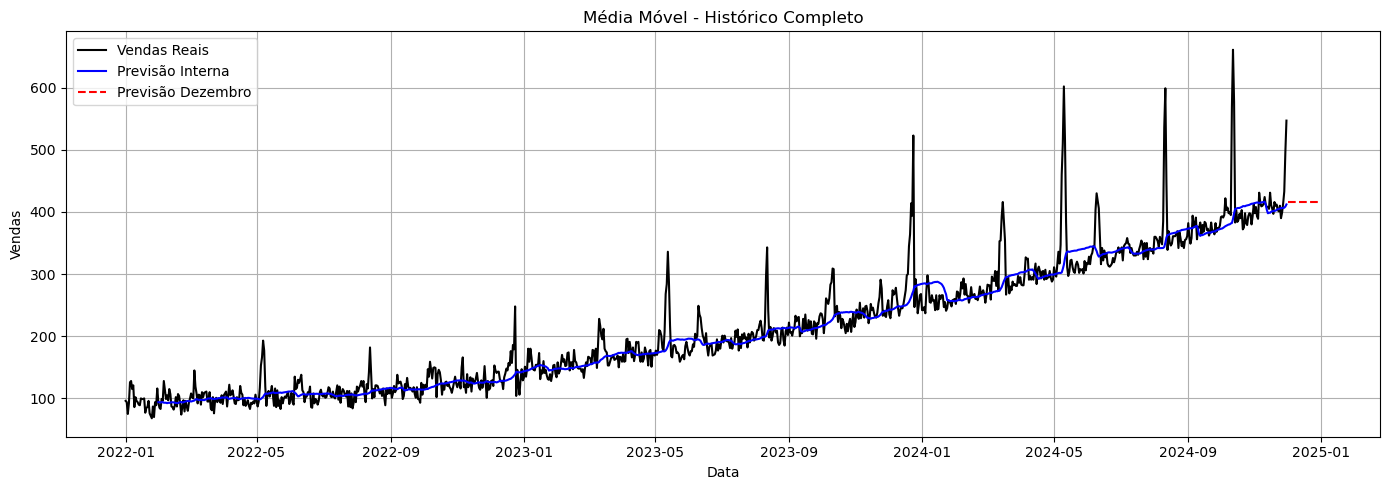

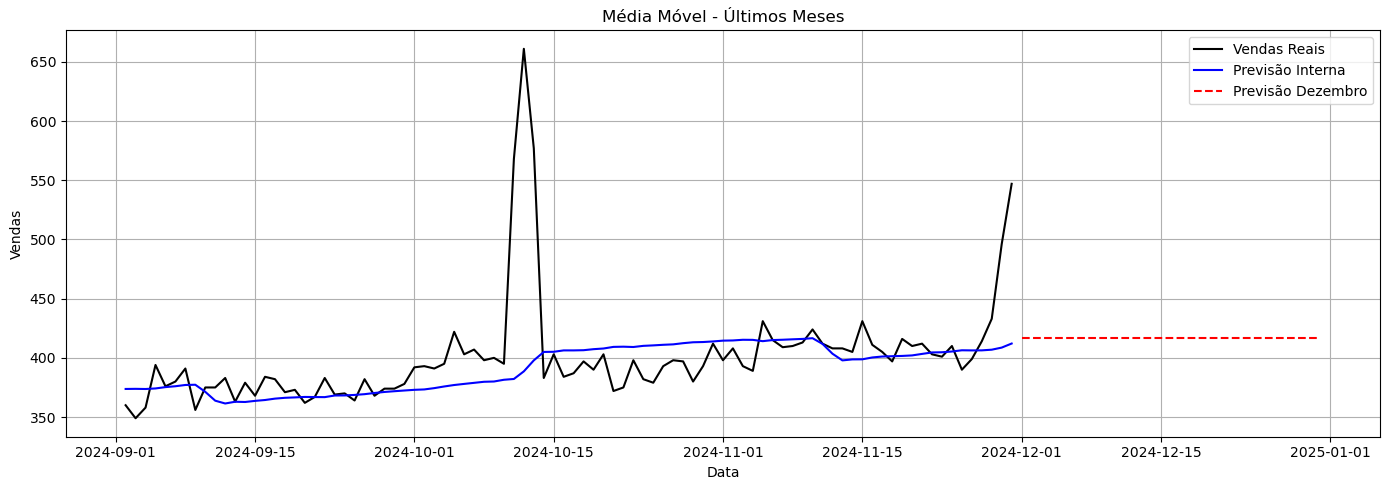

In [227]:

# Modelo 3 - Média Móvel (30 dias)
media_movel_previsto = vendas.rolling(window=30).mean().shift(1)
media_movel_futuro = pd.Series(vendas.rolling(window=30).mean().iloc[-1], index=periodo_previsao)
erros_media_movel = calcular_erros(vendas[30:], media_movel_previsto[30:])
resultados['Média Móvel'] = erros_media_movel
plot_forecasts("Média Móvel", vendas, media_movel_previsto, media_movel_futuro, ultimos=False)
plot_forecasts("Média Móvel", vendas, media_movel_previsto, media_movel_futuro, ultimos=True)

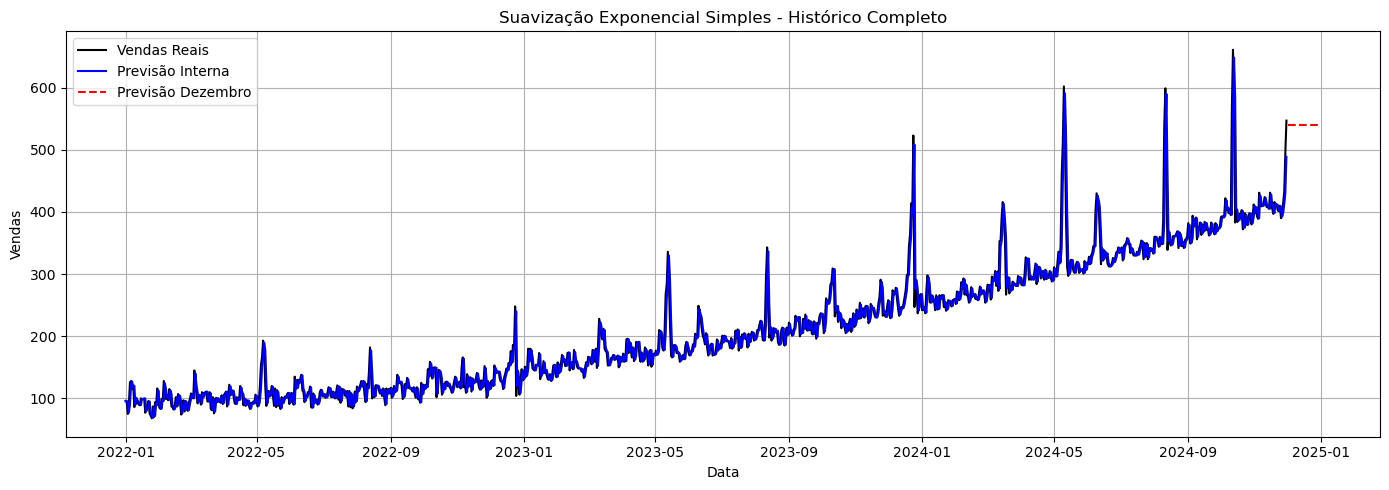

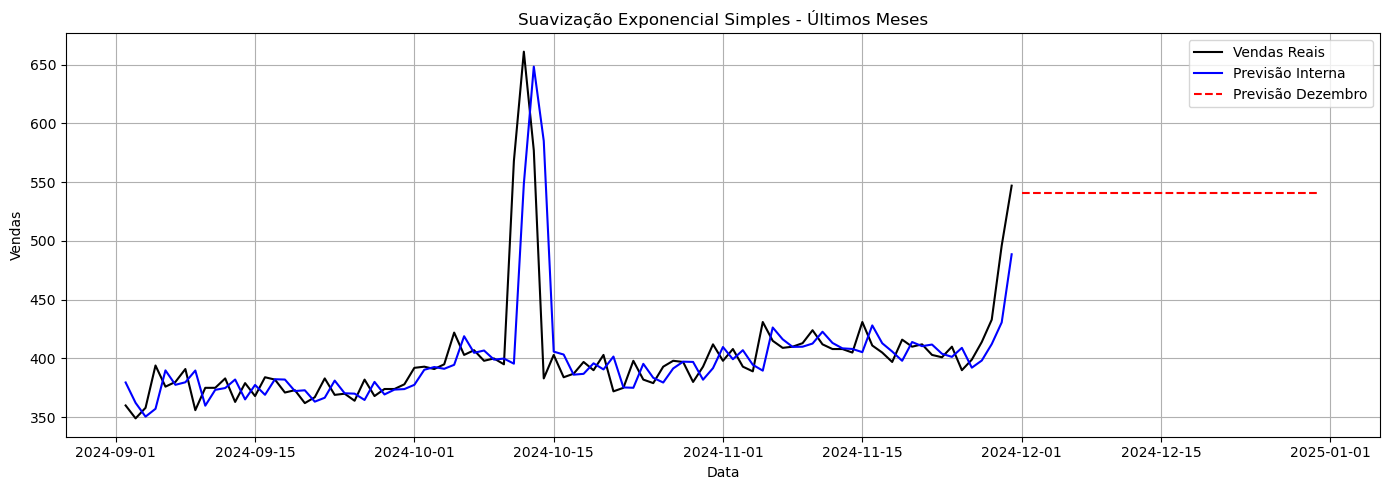

In [228]:

# Modelo 4 - Suavização Exponencial Simples
ses_model = SimpleExpSmoothing(vendas, initialization_method="heuristic").fit()
ses_previsto = ses_model.fittedvalues
ses_futuro = pd.Series(ses_model.forecast(n_periodos), index=periodo_previsao)
erros_ses = calcular_erros(vendas[1:], ses_previsto[1:])
resultados['SES'] = erros_ses
plot_forecasts("Suavização Exponencial Simples", vendas, ses_previsto, ses_futuro, ultimos=False)
plot_forecasts("Suavização Exponencial Simples", vendas, ses_previsto, ses_futuro, ultimos=True)

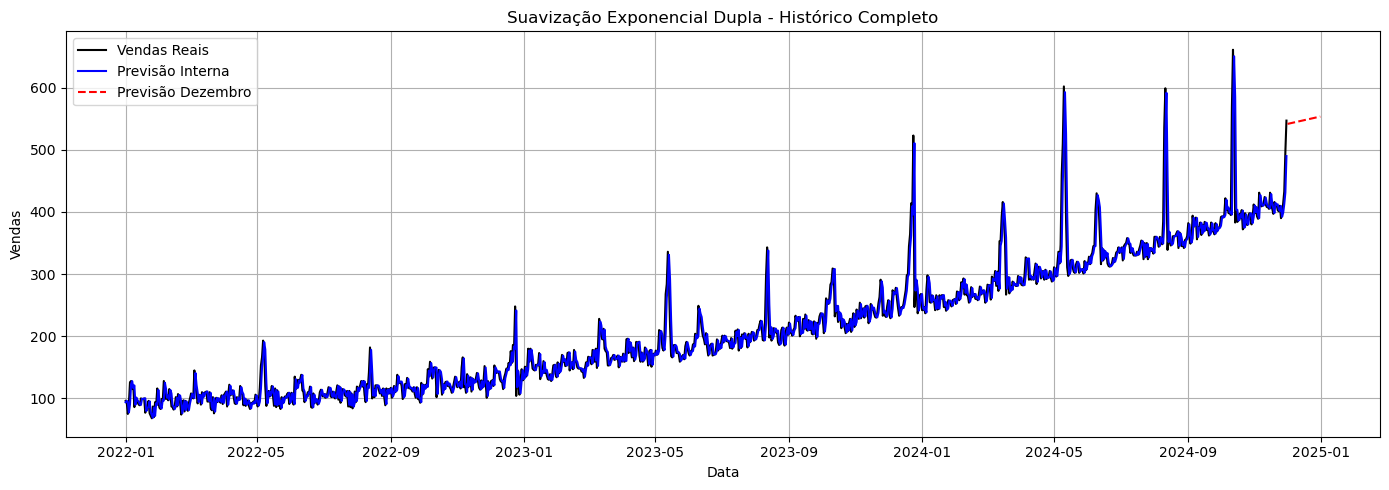

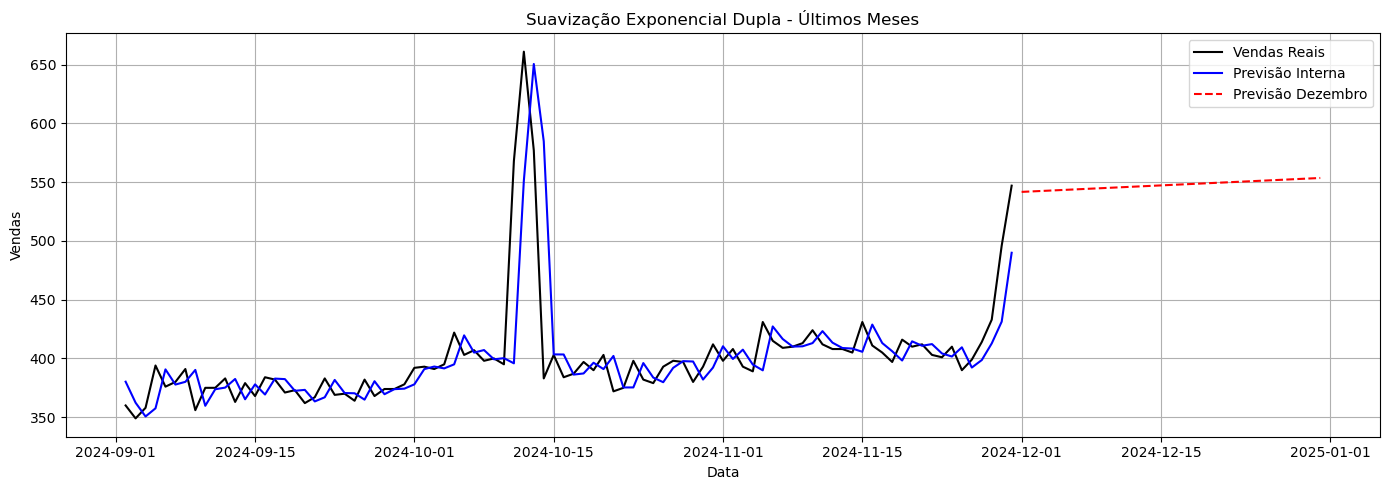

In [229]:
# Modelo 5 - Suavização Exponencial Dupla
des_model = ExponentialSmoothing(vendas, trend='add', seasonal=None, initialization_method="estimated").fit()
des_previsto = des_model.fittedvalues
des_futuro = pd.Series(des_model.forecast(n_periodos), index=periodo_previsao)
erros_des = calcular_erros(vendas, des_previsto)
resultados['DES'] = erros_des
plot_forecasts("Suavização Exponencial Dupla", vendas, des_previsto, des_futuro, ultimos=False)
plot_forecasts("Suavização Exponencial Dupla", vendas, des_previsto, des_futuro, ultimos=True)

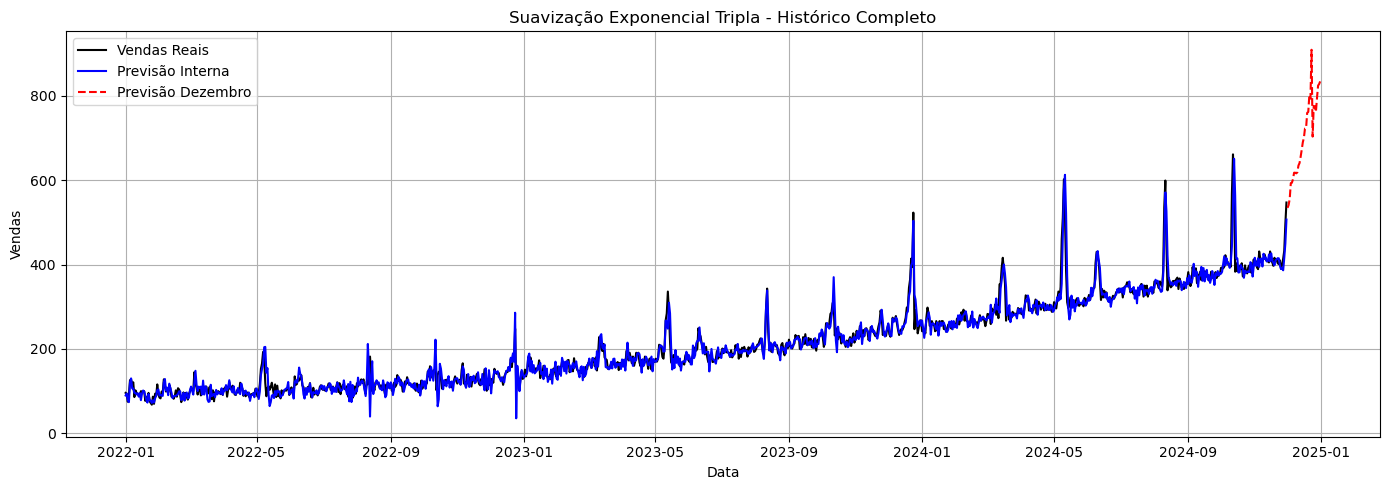

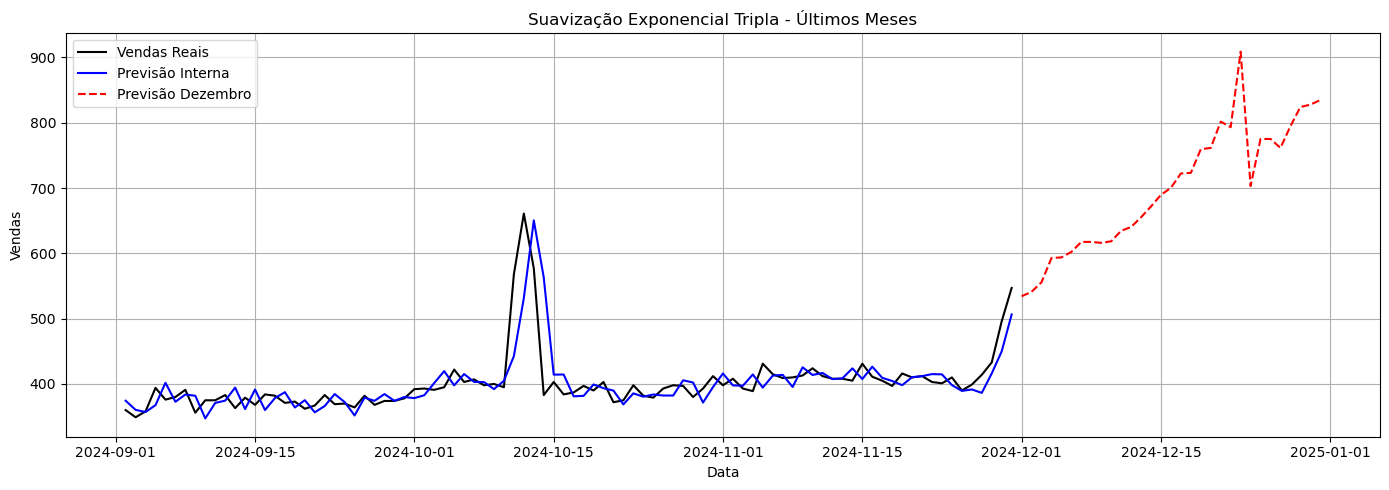

In [230]:
# Modelo 6 - Suavização Exponencial Tripla
tes_model = ExponentialSmoothing(vendas, trend='add', seasonal='add', seasonal_periods=365, initialization_method="estimated").fit()
tes_previsto = tes_model.fittedvalues
tes_futuro = pd.Series(tes_model.forecast(n_periodos), index=periodo_previsao)
erros_tes = calcular_erros(vendas, tes_previsto)
resultados['TES'] = erros_tes
plot_forecasts("Suavização Exponencial Tripla", vendas, tes_previsto, tes_futuro, ultimos=False)
plot_forecasts("Suavização Exponencial Tripla", vendas, tes_previsto, tes_futuro, ultimos=True)

In [231]:
# Tabela de erros
erros_df = pd.DataFrame(resultados).T
erros_df

,MAPE,RMSE,MAD,Erro Padrão,R2
Naive,7.865569,24.297092,14.632519,24.293395,0.944901
Cumulativo,29.514403,103.642450,77.876624,70.317621,-0.002562
Média Móvel,8.062236,32.237989,17.420354,31.849343,0.901862
SES,7.610436,24.178836,14.262301,24.174250,0.945436
DES,7.641050,24.171326,14.277851,24.170968,0.945485
TES,6.906871,20.317505,12.765021,20.316507,0.961483


In [232]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing

# Suavização Exponencial Simples (SES)
ses_model = SimpleExpSmoothing(df['vendas']).fit()
print(f"SES - Suavização Exponencial Simples:")
print(f"  Alfa (α): {ses_model.model.params['smoothing_level']:.4f}")
print()

# Suavização Exponencial Dupla (Holt)
holt_model = Holt(df['vendas']).fit()
print(f"Holt - Suavização Exponencial Dupla:")
print(f"  Alfa (α): {holt_model.model.params['smoothing_level']:.4f}")
print(f"  Beta (β): {holt_model.model.params['smoothing_trend']:.4f}")
print()

# Suavização Exponencial Tripla (Holt-Winters)
hw_model = ExponentialSmoothing(
    df['vendas'], trend='add', seasonal='add', seasonal_periods=12
).fit()
print(f"Holt-Winters - Suavização Exponencial Tripla:")
print(f"  Alfa (α): {hw_model.model.params['smoothing_level']:.4f}")
print(f"  Beta (β): {hw_model.model.params['smoothing_trend']:.4f}")
print(f"  Gama (γ): {hw_model.model.params['smoothing_seasonal']:.4f}")
print()


SES - Suavização Exponencial Simples:
  Alfa (α): 0.8872

Holt - Suavização Exponencial Dupla:
  Alfa (α): 0.9003
  Beta (β): 0.0001

Holt-Winters - Suavização Exponencial Tripla:
  Alfa (α): 0.8900
  Beta (β): 0.0019
  Gama (γ): 0.0242



In [233]:
# Função para calcular os limites de outliers
def limites(serie):
    q1 = serie.quantile(0.25)
    q3 = serie.quantile(0.75)
    amplitude = q3 - q1
    return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude

# Função para excluir outliers
def excluir_outliers(df, nome_coluna):
    qtde_linhas_antes = df.shape[0]
    lim_inf, lim_sup = limites(df[nome_coluna])
    df_filtrado = df[(df[nome_coluna] >= lim_inf) & (df[nome_coluna] <= lim_sup)]
    qtde_linhas_depois = df_filtrado.shape[0]
    linhas_removidas = qtde_linhas_antes - qtde_linhas_depois
    return df_filtrado, linhas_removidas

# Aplicação da função
df_filtrado, linhas_removidas = excluir_outliers(df, 'vendas')

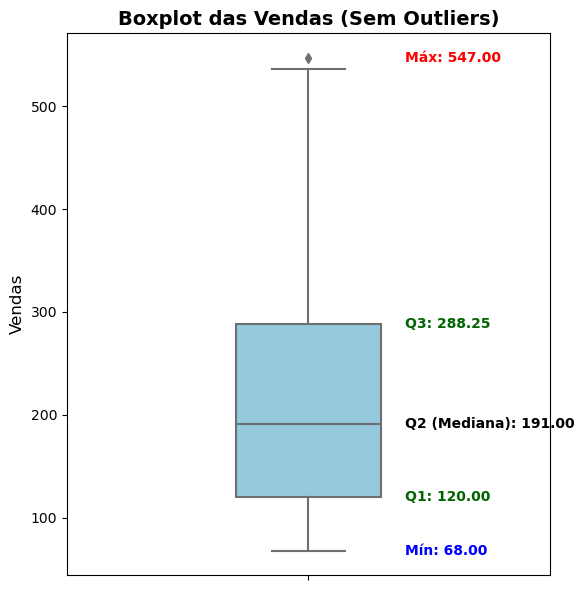


Dados excluídos (outliers):
            vendas
datas             
2024-05-10     602
2024-08-11     599
2024-10-11     568
2024-10-12     661
2024-10-13     577

5 linhas removidas na coluna de Vendas


In [234]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------ DETECÇÃO DE OUTLIERS ------------------
# Calcula quartis e IQR
Q1 = df["vendas"].quantile(0.25)
Q3 = df["vendas"].quantile(0.75)
IQR = Q3 - Q1

# Limites para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtra dados sem outliers
df_filtrado = df[(df["vendas"] >= limite_inferior) & (df["vendas"] <= limite_superior)]

# Captura os outliers
df_outliers = df[(df["vendas"] < limite_inferior) | (df["vendas"] > limite_superior)]

# Conta as linhas removidas
linhas_removidas = len(df_outliers)

# ------------------ GRÁFICO: Boxplot com estatísticas ------------------
plt.figure(figsize=(6, 6))
sns.boxplot(y=df_filtrado["vendas"], color="skyblue", width=0.3)
plt.title("Boxplot das Vendas (Sem Outliers)", fontsize=14, fontweight='bold')
plt.ylabel("Vendas", fontsize=12)

# Estatísticas principais com base no DataFrame filtrado
q1 = df_filtrado["vendas"].quantile(0.25)
q2 = df_filtrado["vendas"].median()
q3 = df_filtrado["vendas"].quantile(0.75)
minimo = df_filtrado["vendas"].min()
maximo = df_filtrado["vendas"].max()

# Coordenada horizontal para posicionar o texto (ao lado do boxplot)
x_text = 0.2

# Anotações das estatísticas
plt.text(x_text, minimo, f'Mín: {minimo:.2f}', va='center', ha='left', fontsize=10, fontweight='bold', color='blue')
plt.text(x_text, q1, f'Q1: {q1:.2f}', va='center', ha='left', fontsize=10, fontweight='bold', color='darkgreen')
plt.text(x_text, q2, f'Q2 (Mediana): {q2:.2f}', va='center', ha='left', fontsize=10, fontweight='bold', color='black')
plt.text(x_text, q3, f'Q3: {q3:.2f}', va='center', ha='left', fontsize=10, fontweight='bold', color='darkgreen')
plt.text(x_text, maximo, f'Máx: {maximo:.2f}', va='center', ha='left', fontsize=10, fontweight='bold', color='red')

plt.tight_layout()
plt.show()

# ------------------ IMPRIME OS DADOS EXCLUÍDOS ------------------
print("\n\033[1mDados excluídos (outliers):\033[0m")
print(df_outliers)

# Mostrar número de linhas removidas
print('\n\033[1m{} linhas removidas na coluna de Vendas\033[0m'.format(linhas_removidas))


In [235]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error


caminho_arquivo = r"C:\Users\andre\OneDrive\Área de Trabalho\Análise Preditiva\Dataset.xlsx"
nome_planilha = "2025.04.22"

df = pd.read_excel(caminho_arquivo, sheet_name=nome_planilha)
df['datas'] = pd.to_datetime(df['datas'])
df = df.sort_values('datas').reset_index(drop=True)

# 1. Criar variáveis sazonais para eventos nas semanas indicadas
def cria_dummy_semana(df, start_date, end_date, nome):
    df[nome] = np.where((df['datas'] >= pd.to_datetime(start_date)) & (df['datas'] <= pd.to_datetime(end_date)), 1, 0)

for ano in [2022, 2023, 2024]:
    cria_dummy_semana(df, f'{ano}-12-19', f'{ano}-12-25', f'natal_{ano}')
    cria_dummy_semana(df, f'{ano}-06-06', f'{ano}-06-12', f'dia_namorados_{ano}')
    cria_dummy_semana(df, f'{ano}-10-06', f'{ano}-10-12', f'dia_criancas_{ano}')

cria_dummy_semana(df, '2022-05-01', '2022-05-08', 'dia_maes_2022')
cria_dummy_semana(df, '2023-05-07', '2023-05-14', 'dia_maes_2023')
cria_dummy_semana(df, '2024-05-05', '2024-05-12', 'dia_maes_2024')

cria_dummy_semana(df, '2022-08-07', '2022-08-14', 'dia_pais_2022')
cria_dummy_semana(df, '2023-08-06', '2023-08-13', 'dia_pais_2023')
cria_dummy_semana(df, '2024-08-04', '2024-08-11', 'dia_pais_2024')

cria_dummy_semana(df, '2022-11-18', '2022-11-25', 'black_friday_2022')
cria_dummy_semana(df, '2023-11-17', '2023-11-24', 'black_friday_2023')
cria_dummy_semana(df, '2024-11-22', '2024-11-29', 'black_friday_2024')

# 2. Criar variáveis defasadas (lags)
lags = list(range(1, 8)) + [30, 365]
for lag in lags:
    df[f'lag_{lag}'] = df['vendas'].shift(lag)

# 3. Preparar dados para modelagem
df_model = df.dropna().copy()

variaveis_sazonais = [col for col in df.columns if any(ev in col for ev in [
    'natal', 'dia_namorados', 'dia_maes', 'dia_pais', 'dia_criancas', 'black_friday'])]
variaveis_lags = [f'lag_{lag}' for lag in lags]

X = df_model[variaveis_lags + variaveis_sazonais]
X = sm.add_constant(X)
y = df_model['vendas']

# 4. Ajustar o modelo de regressão
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

# 5. Previsão in-sample para o intervalo 01/01/2022 a 30/11/2024
inicio_avaliacao = pd.Timestamp('2022-01-01')
fim_avaliacao = pd.Timestamp('2024-11-30')

df_eval = df[(df['datas'] >= inicio_avaliacao) & (df['datas'] <= fim_avaliacao)].copy()

for lag in lags:
    df_eval[f'lag_{lag}'] = df_eval['vendas'].shift(lag)

for col in variaveis_sazonais:
    df_eval[col] = df_eval[col]

df_eval = df_eval.dropna(subset=variaveis_lags + ['vendas']).copy()

X_eval = df_eval[variaveis_lags + variaveis_sazonais]
X_eval = sm.add_constant(X_eval)
y_eval_real = df_eval['vendas']

# Prever com erro padrão
predictions = modelo.get_prediction(X_eval)
y_eval_pred = predictions.predicted_mean
erro_padrao = predictions.se_mean

# Limpar NaNs
mask = (~np.isnan(y_eval_real)) & (~np.isnan(y_eval_pred))
y_real_limpo = y_eval_real[mask]
y_pred_limpo = y_eval_pred[mask]
erro_padrao_limpo = erro_padrao[mask]

                            OLS Regression Results                            
Dep. Variable:                 vendas   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     476.1
Date:                Fri, 20 Jun 2025   Prob (F-statistic):               0.00
Time:                        16:01:00   Log-Likelihood:                -3179.9
No. Observations:                 700   AIC:                             6402.
Df Residuals:                     679   BIC:                             6497.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.9012      3

In [236]:
# Métricas de avaliação
mad = mean_absolute_error(y_real_limpo, y_pred_limpo)
rmse = mean_squared_error(y_real_limpo, y_pred_limpo, squared=False)
mape = np.mean(np.abs((y_real_limpo - y_pred_limpo) / y_real_limpo)) * 100
r2 = modelo.rsquared
residuos_abs = np.abs(y_real_limpo - y_pred_limpo)
erro_padrao_absoluto = np.std(residuos_abs)

print("\033[1m Métricas do Modelo (01/01/2022 a 30/11/2024)\033[0m")
print(f"MAD: {mad:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"Erro Padrão Absoluto: {erro_padrao_absoluto:.2f}")
print(f"R²: {r2:.4f}")


 Métricas do Modelo (01/01/2022 a 30/11/2024)
MAD: 14.60
RMSE: 22.73
MAPE: 5.52%
Erro Padrão Absoluto: 17.43
R²: 0.9334


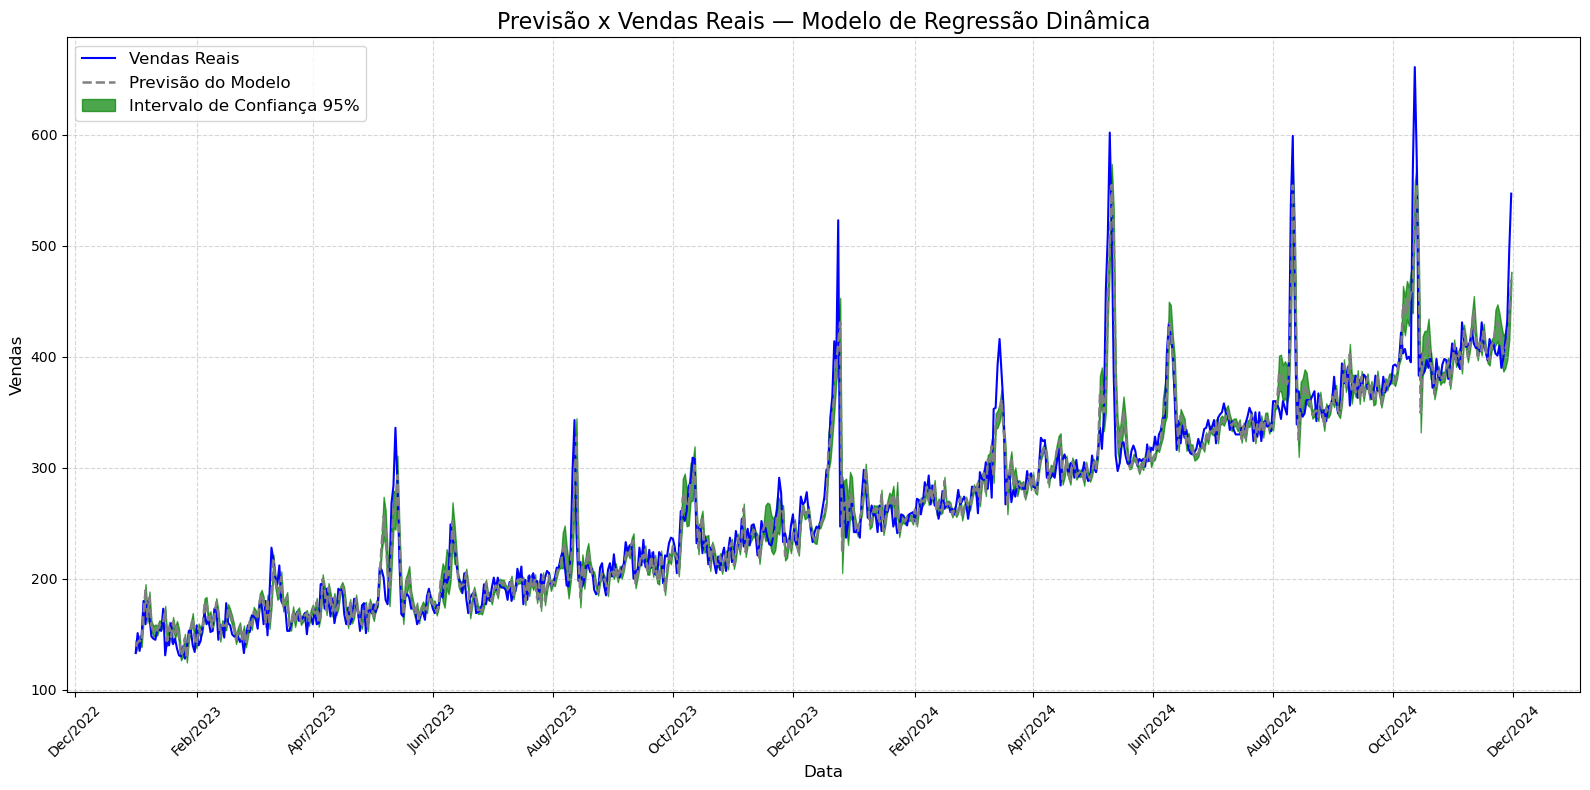

In [237]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 6. Gráfico da previsão vs valores reais
plt.figure(figsize=(16, 8))

# Plot das vendas reais (suavizado com média móvel de 7 dias, opcional)
plt.plot(df_eval['datas'][mask], y_real_limpo, label='Vendas Reais', color='blue', linewidth=1.5)

# Plot da previsão
plt.plot(df_eval['datas'][mask], y_pred_limpo, label='Previsão do Modelo', color='gray', linestyle='--', linewidth=1.8)

# Faixa de erro (intervalo de confiança de 95%)
plt.fill_between(df_eval['datas'][mask],
                 y_pred_limpo - 1.96 * erro_padrao_limpo,
                 y_pred_limpo + 1.96 * erro_padrao_limpo,
                 color='green', alpha=0.7, label='Intervalo de Confiança 95%')

# Títulos e eixos
plt.title('Previsão x Vendas Reais — Modelo de Regressão Dinâmica', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Vendas', fontsize=12)

# Melhoria no eixo X com formato de data mais claro
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b/%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.xticks(rotation=45)

# Grade, legenda e layout
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


In [239]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error


caminho_arquivo = r"C:\Users\andre\OneDrive\Área de Trabalho\Análise Preditiva\Dataset.xlsx"
nome_planilha = "2025.04.22"

df = pd.read_excel(caminho_arquivo, sheet_name=nome_planilha)
df['datas'] = pd.to_datetime(df['datas'])
df = df.sort_values('datas').reset_index(drop=True)

# 1. Criar variáveis sazonais para eventos nas semanas indicadas
def cria_dummy_semana(df, start_date, end_date, nome):
    df[nome] = np.where((df['datas'] >= pd.to_datetime(start_date)) & (df['datas'] <= pd.to_datetime(end_date)), 1, 0)

for ano in [2022, 2023, 2024]:
    cria_dummy_semana(df, f'{ano}-12-19', f'{ano}-12-25', f'natal_{ano}')
    cria_dummy_semana(df, f'{ano}-06-06', f'{ano}-06-12', f'dia_namorados_{ano}')
    cria_dummy_semana(df, f'{ano}-10-06', f'{ano}-10-12', f'dia_criancas_{ano}')

cria_dummy_semana(df, '2022-05-01', '2022-05-08', 'dia_maes_2022')
cria_dummy_semana(df, '2023-05-07', '2023-05-14', 'dia_maes_2023')
cria_dummy_semana(df, '2024-05-05', '2024-05-12', 'dia_maes_2024')

cria_dummy_semana(df, '2022-08-07', '2022-08-14', 'dia_pais_2022')
cria_dummy_semana(df, '2023-08-06', '2023-08-13', 'dia_pais_2023')
cria_dummy_semana(df, '2024-08-04', '2024-08-11', 'dia_pais_2024')

cria_dummy_semana(df, '2022-11-18', '2022-11-25', 'black_friday_2022')
cria_dummy_semana(df, '2023-11-17', '2023-11-24', 'black_friday_2023')
cria_dummy_semana(df, '2024-11-22', '2024-11-29', 'black_friday_2024')

# 2. Criar variáveis defasadas (lags)
lags = list(range(1, 8)) + [30, 365]
for lag in lags:
    df[f'lag_{lag}'] = df['vendas'].shift(lag)

# 3. Preparar dados para modelagem
df_model = df.dropna().copy()

variaveis_sazonais = [col for col in df.columns if any(ev in col for ev in [
    'natal', 'dia_namorados', 'dia_maes', 'dia_pais', 'dia_criancas', 'black_friday'])]
variaveis_lags = [f'lag_{lag}' for lag in lags]

X = df_model[variaveis_lags + variaveis_sazonais]
X = sm.add_constant(X)
y = df_model['vendas']


# 4. Previsão in-sample para o intervalo 01/01/2022 a 30/11/2024
inicio_avaliacao = pd.Timestamp('2022-01-01')
fim_avaliacao = pd.Timestamp('2024-11-30')

df_eval = df[(df['datas'] >= inicio_avaliacao) & (df['datas'] <= fim_avaliacao)].copy()

for lag in lags:
    df_eval[f'lag_{lag}'] = df_eval['vendas'].shift(lag)

for col in variaveis_sazonais:
    df_eval[col] = df_eval[col]

df_eval = df_eval.dropna(subset=variaveis_lags + ['vendas']).copy()

X_eval = df_eval[variaveis_lags + variaveis_sazonais]
X_eval = sm.add_constant(X_eval)
y_eval_real = df_eval['vendas']

# Prever com erro padrão
predictions = modelo.get_prediction(X_eval)
y_eval_pred = predictions.predicted_mean
erro_padrao = predictions.se_mean

# Limpar NaNs
mask = (~np.isnan(y_eval_real)) & (~np.isnan(y_eval_pred))
y_real_limpo = y_eval_real[mask]
y_pred_limpo = y_eval_pred[mask]
erro_padrao_limpo = erro_padrao[mask]


# 5. Criar DataFrame para dezembro de 2024 onde serão armazenadas as previsões

datas_futuras = pd.date_range(start='2024-12-01', end='2024-12-31')
df_futuro = pd.DataFrame({'datas': datas_futuras})

# 6. Criar as variáveis sazonais para dezembro de 2024 

def cria_dummy_semana(df, start_date, end_date, nome):
    df[nome] = np.where((df['datas'] >= pd.to_datetime(start_date)) & (df['datas'] <= pd.to_datetime(end_date)), 1, 0)

# Criar todas as variáveis sazonais usadas no modelo para dezembro de 2024
for ano in [2022, 2023, 2024]:
    cria_dummy_semana(df_futuro, f'{ano}-12-19', f'{ano}-12-25', f'natal_{ano}')
    cria_dummy_semana(df_futuro, f'{ano}-06-06', f'{ano}-06-12', f'dia_namorados_{ano}')
    cria_dummy_semana(df_futuro, f'{ano}-10-06', f'{ano}-10-12', f'dia_criancas_{ano}')

cria_dummy_semana(df_futuro, '2022-05-01', '2022-05-08', 'dia_maes_2022')
cria_dummy_semana(df_futuro, '2023-05-07', '2023-05-14', 'dia_maes_2023')
cria_dummy_semana(df_futuro, '2024-05-05', '2024-05-12', 'dia_maes_2024')

cria_dummy_semana(df_futuro, '2022-08-07', '2022-08-14', 'dia_pais_2022')
cria_dummy_semana(df_futuro, '2023-08-06', '2023-08-13', 'dia_pais_2023')
cria_dummy_semana(df_futuro, '2024-08-04', '2024-08-11', 'dia_pais_2024')

cria_dummy_semana(df_futuro, '2022-11-18', '2022-11-25', 'black_friday_2022')
cria_dummy_semana(df_futuro, '2023-11-17', '2023-11-24', 'black_friday_2023')
cria_dummy_semana(df_futuro, '2024-11-22', '2024-11-29', 'black_friday_2024')

# 7. Inicializar variáveis defasadas (lags) em df_futuro
lags = list(range(1, 8)) + [30, 365]
for lag in lags:
    df_futuro[f'lag_{lag}'] = np.nan

# 8. Preencher o primeiro dia de dezembro com valores históricos para os lags

# Datas do df original para referência
datas_historicas = df['datas']

for lag in lags:
    lag_date = df_futuro.loc[0, 'datas'] - pd.Timedelta(days=lag)
    if lag_date in datas_historicas.values:
        valor_lag = df.loc[df['datas'] == lag_date, 'vendas'].values[0]
    else:
        # Se não tem no histórico, usar média das vendas como fallback
        valor_lag = df['vendas'].mean()
    df_futuro.loc[0, f'lag_{lag}'] = valor_lag

# 9. Previsão iterativa para o restante dos dias de dezembro

previsoes = []

# Lista de variáveis usadas no modelo (lags + sazonais)
variaveis_sazonais = [col for col in df.columns if any(ev in col for ev in [
    'natal', 'dia_namorados', 'dia_maes', 'dia_pais', 'dia_criancas', 'black_friday'])]
variaveis_lags = [f'lag_{lag}' for lag in lags]

# Variáveis que o modelo espera, menos constante
variaveis_esperadas = modelo.params.index.drop('const', errors='ignore')

for i in range(len(df_futuro)):
    if i > 0:
        for lag in lags:
            lag_date = df_futuro.loc[i, 'datas'] - pd.Timedelta(days=lag)
            if lag_date in df['datas'].values:
                valor_lag = df.loc[df['datas'] == lag_date, 'vendas'].values[0]
            elif lag_date in df_futuro.loc[:i-1, 'datas'].values:
                idx_prev = df_futuro.index[df_futuro['datas'] == lag_date][0]
                valor_lag = previsoes[idx_prev]
            else:
                valor_lag = df['vendas'].mean()
            df_futuro.loc[i, f'lag_{lag}'] = valor_lag

    # Montar vetor X para previsão, só com as variáveis que o modelo espera
    X_fut = df_futuro.loc[i, variaveis_esperadas]
    X_fut = sm.add_constant(pd.DataFrame([X_fut]), has_constant='add')

    y_pred = modelo.predict(X_fut).iloc[0]
    previsoes.append(y_pred)

df_futuro['vendas_previstas'] = previsoes

# 10. Exibir resultados
print("Previsão para Dezembro de 2024")
print(df_futuro[['datas', 'vendas_previstas']])

Previsão para Dezembro de 2024
        datas  vendas_previstas
0  2024-12-01        483.209609
1  2024-12-02        431.124210
2  2024-12-03        409.364297
3  2024-12-04        421.425822
4  2024-12-05        439.558731
5  2024-12-06        454.933633
6  2024-12-07        463.389219
7  2024-12-08        451.715015
8  2024-12-09        432.504461
9  2024-12-10        416.570523
10 2024-12-11        414.011452
11 2024-12-12        418.794681
12 2024-12-13        422.964604
13 2024-12-14        427.268324
14 2024-12-15        434.543811
15 2024-12-16        439.712562
16 2024-12-17        451.335349
17 2024-12-18        458.309410
18 2024-12-19        483.811122
19 2024-12-20        507.432633
20 2024-12-21        543.113992
21 2024-12-22        553.446627
22 2024-12-23        613.835214
23 2024-12-24        529.592529
24 2024-12-25        489.696403
25 2024-12-26        465.166193
26 2024-12-27        448.310705
27 2024-12-28        451.533881
28 2024-12-29        471.512935
29 2024-1

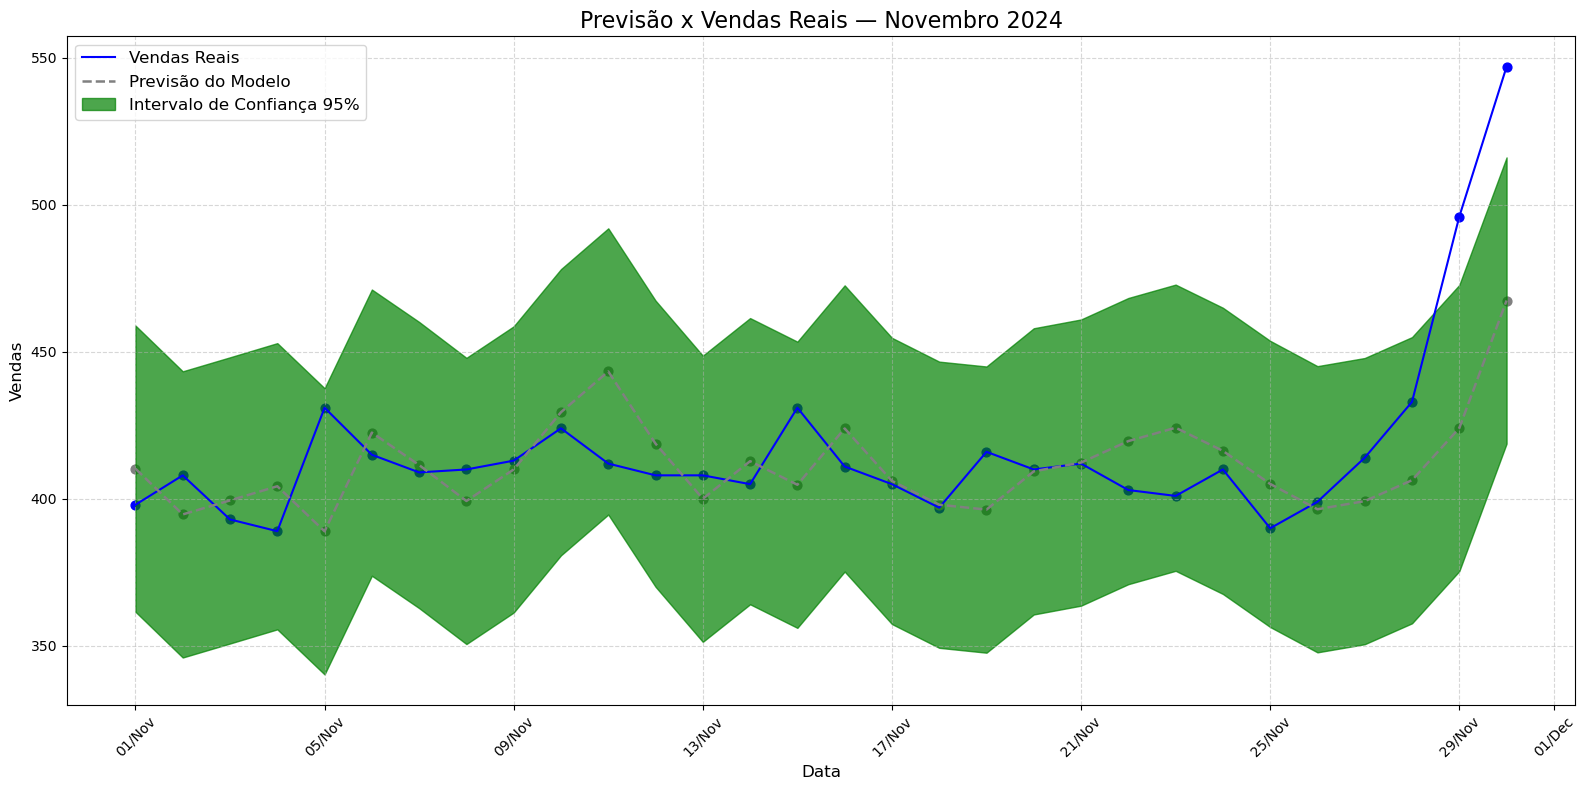

In [248]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Calcular erro padrão dos resíduos para simular a faixa de confiança
residuos = df_comparacao['vendas'] - df_comparacao['vendas_previstas']
erro_padrao = residuos.std()

# Criar gráfico
plt.figure(figsize=(16, 8))

# Linha das vendas reais + pontos
plt.plot(df_comparacao['datas'], df_comparacao['vendas'], label='Vendas Reais', color='blue', linewidth=1.5)
plt.scatter(df_comparacao['datas'], df_comparacao['vendas'], color='blue', s=40)

# Linha da previsão + pontos
plt.plot(df_comparacao['datas'], df_comparacao['vendas_previstas'], label='Previsão do Modelo', color='gray', linestyle='--', linewidth=1.8)
plt.scatter(df_comparacao['datas'], df_comparacao['vendas_previstas'], color='gray', s=40)

# Faixa de erro simulada
plt.fill_between(df_comparacao['datas'],
                 df_comparacao['vendas_previstas'] - 1.96 * erro_padrao,
                 df_comparacao['vendas_previstas'] + 1.96 * erro_padrao,
                 color='green', alpha=0.7, label='Intervalo de Confiança 95%')

# Título e eixos
plt.title('Previsão x Vendas Reais — Novembro 2024', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Vendas', fontsize=12)

# Eixo X com datas mais legíveis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%b'))
plt.xticks(rotation=45)

# Grade, legenda e layout
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


In [275]:
import pandas as pd

# Dicionário com os resultados dos modelos
resultados = {
    'Naive': {
        'MAPE (%)': 7.87,
        'RMSE': 24.30,
        'MAD': 14.63,
        'Erro Padrão': 24.29,
        'R²': 0.9449
    },
    'Cumulativo': {
        'MAPE (%)': 29.51,
        'RMSE': 103.64,
        'MAD': 77.88,
        'Erro Padrão': 70.32,
        'R²': -0.0026
    },
    'Média Móvel': {
        'MAPE (%)': 8.06,
        'RMSE': 32.24,
        'MAD': 17.42,
        'Erro Padrão': 31.85,
        'R²': 0.9019
    },
    'SES': {
        'MAPE (%)': 7.61,
        'RMSE': 24.18,
        'MAD': 14.26,
        'Erro Padrão': 24.17,
        'R²': 0.9454
    },
    'DES': {
        'MAPE (%)': 7.64,
        'RMSE': 24.17,
        'MAD': 14.28,
        'Erro Padrão': 24.17,
        'R²': 0.9455
    },
    'TES': {
        'MAPE (%)': 6.91,
        'RMSE': 20.32,
        'MAD': 12.77,
        'Erro Padrão': 20.32,
        'R²': 0.9615
    },
    'Regressão para Dezembro': {
        'MAPE (%)': 5.52,
        'RMSE': 22.73,
        'MAD': 14.60,
        'Erro Padrão': 17.43,
        'R²': 0.9334
    },
    'Regressão para Novembro': {
        'MAPE (%)': 3.74,
        'RMSE': 24.88,
        'MAD': 16.50,
        'Erro Padrão': 17.43,
        'R²': 0.3442
    },
    'KNN': {
        'MAPE (%)': 5.37 ,
        'RMSE': 35.84,
        'MAD': 23.89,
        'Erro Padrão': 27.18,
        'R²': -0.3612
    },
    'SVR': {
        'MAPE (%)': 5.09,
        'RMSE': 24.43,
        'MAD': 13.59,
        'Erro Padrão': 20.30,
        'R²': 0.9231
    },
    'Random Forest': {
        'MAPE (%)': 3.30,
        'RMSE': 15.86,
        'MAD': 8.81,
        'Erro Padrão': 13.19,
        'R²': 0.9642
    }
}

# Criar DataFrame
erros_df = pd.DataFrame(resultados).T

# Exibir
erros_df


,MAPE (%),RMSE,MAD,Erro Padrão,R²
Naive,7.87,24.30,14.63,24.29,0.9449
Cumulativo,29.51,103.64,77.88,70.32,-0.0026
Média Móvel,8.06,32.24,17.42,31.85,0.9019
SES,7.61,24.18,14.26,24.17,0.9454
DES,7.64,24.17,14.28,24.17,0.9455
TES,6.91,20.32,12.77,20.32,0.9615
Regressão para Dezembro,5.52,22.73,14.60,17.43,0.9334
Regressão para Novembro,3.74,24.88,16.50,17.43,0.3442
KNN,5.37,35.84,23.89,27.18,-0.3612
SVR,5.09,24.43,13.59,20.30,0.9231



=== Melhores resultados por distância ===
    K    Distância        MAE       RMSE        R²
17  8    manhattan  23.890465  35.844929 -0.361214
2   3    euclidean  24.012246  38.533262 -0.573050
21  2  mahalanobis  44.885783  58.683122 -2.648357

=== Tabela completa ===
Distância  euclidean  mahalanobis  manhattan
K                                           
1              44.50        61.33      39.04
2              39.51        58.68      37.24
3              38.53        60.82      37.60
4              38.96        64.51      38.53
5              39.16        68.37      38.91
6              39.28        69.49      38.03
7              39.28        70.33      38.17
8              39.72        70.40      35.84
9              40.59        74.42      37.14
10             41.26        76.11      38.26


Distância,K,MAPE (%),RMSE,MAD,MAE,R²
Manhattan,8,5.37,35.84,23.89,23.89,-0.3612
Euclidean,3,5.36,38.53,24.01,24.01,-0.5730
Mahalanobis,2,10.44,58.68,44.89,44.89,-2.6484


Distância,K,MAPE (%),RMSE,MAD,MAE,R²
Euclidean,1,6.83,44.50,30.13,30.13,-1.0976
Euclidean,2,5.75,39.51,25.57,25.57,-0.6535
Euclidean,3,5.36,38.53,24.01,24.01,-0.5730
Euclidean,4,5.65,38.96,25.20,25.20,-0.6084
Euclidean,5,5.57,39.16,24.89,24.89,-0.6245
Euclidean,6,5.68,39.28,25.34,25.34,-0.6344
Euclidean,7,5.86,39.28,26.09,26.09,-0.6344
Euclidean,8,6.03,39.72,26.76,26.76,-0.6716
Euclidean,9,6.20,40.59,27.51,27.51,-0.7457
Euclidean,10,6.40,41.26,28.35,28.35,-0.8034


Distância,K,MAPE (%),RMSE,MAD,MAE,R²
Manhattan,8,5.37,35.84,23.89,23.89,-0.3612
Euclidean,3,5.36,38.53,24.01,24.01,-0.5730
Mahalanobis,2,10.44,58.68,44.89,44.89,-2.6484


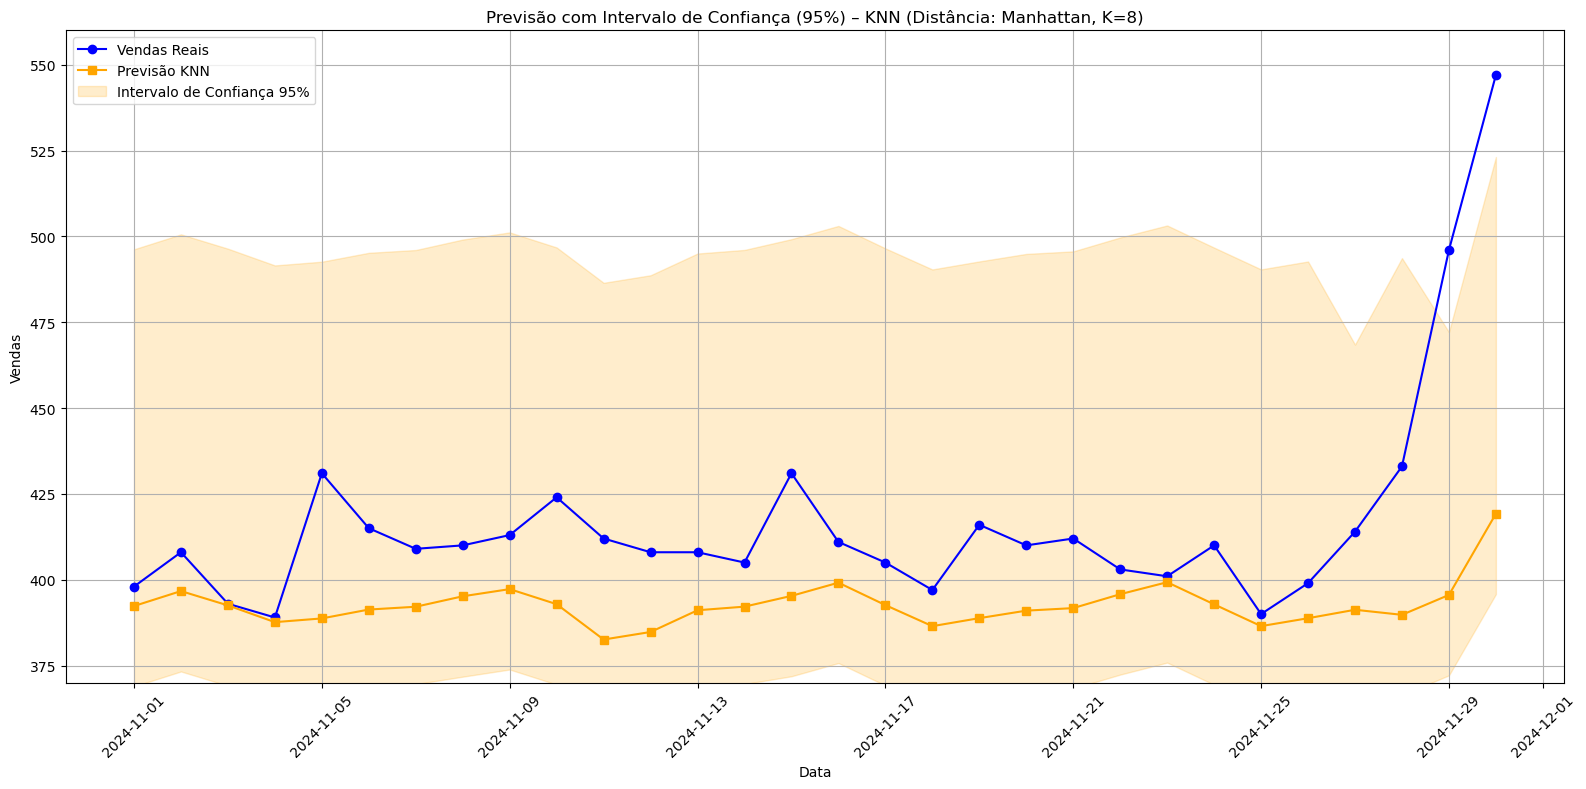

In [277]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


df = pd.read_excel(
    r"C:\Users\andre\OneDrive\Área de Trabalho\Análise Preditiva\Análise Preditiva\Dataset.xlsx",
    sheet_name="2025.04.22"
)

df['datas'] = pd.to_datetime(df['datas'])


# --- Função para criar dummies sazonais ---
def cria_dummy_semana(df, data_inicio, data_fim, nome_coluna):
    data_inicio = pd.to_datetime(data_inicio)
    data_fim = pd.to_datetime(data_fim)
    df[nome_coluna] = ((df['datas'] >= data_inicio) & (df['datas'] <= data_fim)).astype(int)


# --- LAGS ---
lags = list(range(1, 8)) + [30, 365]
for lag in lags:
    df[f'lag_{lag}'] = df['vendas'].shift(lag)

# --- Variáveis sazonais ---
for ano in [2022, 2023, 2024]:
    cria_dummy_semana(df, f'{ano}-12-19', f'{ano}-12-25', f'natal_{ano}')
    cria_dummy_semana(df, f'{ano}-06-06', f'{ano}-06-12', f'dia_namorados_{ano}')
    cria_dummy_semana(df, f'{ano}-10-06', f'{ano}-10-12', f'dia_criancas_{ano}')
cria_dummy_semana(df, '2022-05-01', '2022-05-15', 'dia_maes_2022')
cria_dummy_semana(df, '2023-05-07', '2023-05-21', 'dia_maes_2023')
cria_dummy_semana(df, '2024-05-05', '2024-05-19', 'dia_maes_2024')
cria_dummy_semana(df, '2022-08-07', '2022-08-21', 'dia_pais_2022')
cria_dummy_semana(df, '2023-08-06', '2023-08-20', 'dia_pais_2023')
cria_dummy_semana(df, '2024-08-04', '2024-08-18', 'dia_pais_2024')
cria_dummy_semana(df, '2022-11-18', '2022-11-30', 'black_friday_2022')
cria_dummy_semana(df, '2023-11-17', '2023-11-30', 'black_friday_2023')
cria_dummy_semana(df, '2024-11-15', '2024-11-30', 'black_friday_2024')

# --- Variáveis temporais originais ---
df['dia_do_ano'] = df['datas'].dt.dayofyear
df['mes'] = df['datas'].dt.month
df['dia_da_semana'] = df['datas'].dt.dayofweek

# --- Encoding cíclico ---
df['sin_dia_ano'] = np.sin(2 * np.pi * df['dia_do_ano'] / 365)
df['cos_dia_ano'] = np.cos(2 * np.pi * df['dia_do_ano'] / 365)

df['sin_mes'] = np.sin(2 * np.pi * df['mes'] / 12)
df['cos_mes'] = np.cos(2 * np.pi * df['mes'] / 12)

df['sin_semana'] = np.sin(2 * np.pi * df['dia_da_semana'] / 7)
df['cos_semana'] = np.cos(2 * np.pi * df['dia_da_semana'] / 7)


# --- Preparar dados ---
df = df.dropna().reset_index(drop=True)
lags_cols = [f'lag_{l}' for l in lags]
variaveis_sazonais = [col for col in df.columns if any(x in col for x in ['natal', 'namorados', 'criancas', 'maes', 'pais', 'black_friday'])]
variaveis_temporais = ['sin_dia_ano', 'cos_dia_ano',
                       'sin_mes', 'cos_mes',
                       'sin_semana', 'cos_semana']


X = df[variaveis_sazonais + lags_cols + variaveis_temporais]
y = df['vendas']

# --- Separar treino e teste ---
df['datas'] = pd.to_datetime(df['datas'])
X_train = X[df['datas'] <= '2024-10-31']
X_test = X[(df['datas'] >= '2024-11-01') & (df['datas'] <= '2024-11-30')]
y_train = y[df['datas'] <= '2024-10-31']
y_test = y[(df['datas'] >= '2024-11-01') & (df['datas'] <= '2024-11-30')]

# --- Escalar ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Mahalanobis: calcular VI ---
VI = np.linalg.pinv(np.cov(X_train_scaled.T))

# --- Distâncias e loop de hiperparâmetros ---
distancias = {
    'euclidean': {'metric': 'euclidean', 'use_scaled': True},
    'manhattan': {'metric': 'manhattan', 'use_scaled': True},
    'mahalanobis': {'metric': 'mahalanobis', 'use_scaled': True, 'params': {'VI': VI}},
}

resultados = []

for dist_nome, dist_info in distancias.items():
    for k in range(1, 11):
        if dist_info['use_scaled']:
            X_train_use = X_train_scaled
            X_test_use = X_test_scaled
        else:
            X_train_use = X_train
            X_test_use = X_test

        if dist_nome == 'mahalanobis':
            knn = KNeighborsRegressor(n_neighbors=k, metric='mahalanobis', metric_params=dist_info['params'], weights='distance')
        else:
            knn = KNeighborsRegressor(n_neighbors=k, metric=dist_info['metric'], weights='distance')

        knn.fit(X_train_use, y_train)
        y_pred = knn.predict(X_test_use)

        mae = mean_absolute_error(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)

        resultados.append({
            'K': k,
            'Distância': dist_nome,
            'MAE': mae,
            'RMSE': rmse,
            'R²': r2
        })

# --- Resultados organizados ---
df_resultados = pd.DataFrame(resultados)
print("\n=== Melhores resultados por distância ===")
print(df_resultados.loc[df_resultados.groupby("Distância")["RMSE"].idxmin()].sort_values('RMSE'))

print("\n=== Tabela completa ===")
print(df_resultados.pivot_table(index='K', columns='Distância', values='RMSE').round(2))


from sklearn.metrics import mean_absolute_percentage_error

# --- Atualizar loop com MAPE e MAD ---
resultados = []

for dist_nome, dist_info in distancias.items():
    for k in range(1, 11):
        if dist_info['use_scaled']:
            X_train_use = X_train_scaled
            X_test_use = X_test_scaled
        else:
            X_train_use = X_train
            X_test_use = X_test

        if dist_nome == 'mahalanobis':
            knn = KNeighborsRegressor(n_neighbors=k, metric='mahalanobis', metric_params=dist_info['params'], weights='distance')
        else:
            knn = KNeighborsRegressor(n_neighbors=k, metric=dist_info['metric'], weights='distance')

        knn.fit(X_train_use, y_train)
        y_pred = knn.predict(X_test_use)

        mae = mean_absolute_error(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred) * 100
        mad = np.mean(np.abs(y_test - y_pred))

        resultados.append({
            'Distância': dist_nome.capitalize(),
            'K': k,
            'MAPE (%)': mape,
            'RMSE': rmse,
            'MAD': mad,
            'MAE': mae,
            'R²': r2
        })

# --- Resultados em DataFrame ---
df_resultados = pd.DataFrame(resultados)




# --- Selecionar melhores modelos por distância ---
melhores_modelos = df_resultados.loc[df_resultados.groupby("Distância")["RMSE"].idxmin()].sort_values('RMSE')

# --- Estilo visual tipo imagem ---
def estilo_tabela(df):
    return (
        df.style
        .set_caption("Desempenho dos Modelos KNN com Diferentes Distâncias")
        .format({
            'MAPE (%)': '{:.2f}',
            'RMSE': '{:.2f}',
            'MAD': '{:.2f}',
            'MAE': '{:.2f}',
            'R²': '{:.4f}'
        })
        .set_table_styles([
            {"selector": "th", "props": [("text-align", "center")]},
            {"selector": "caption", "props": [("caption-side", "top"), ("font-size", "16px"), ("font-weight", "bold")]}
        ])
        .hide(axis="index")
    )

# --- Exibir melhores modelos ---
display(estilo_tabela(melhores_modelos))

# --- Exibir tabela completa, ordenada por distância e K ---
display(estilo_tabela(df_resultados.sort_values(['Distância', 'K'])))




# --- Exibir estilo no Jupyter Notebook ou ambiente compatível ---
display(estilo_tabela(melhores_modelos))



import matplotlib.pyplot as plt

# --- Melhor modelo ---
melhor_idx = df_resultados['RMSE'].idxmin()
melhor_modelo = df_resultados.loc[melhor_idx]
melhor_dist = melhor_modelo['Distância'].lower()
melhor_k = int(melhor_modelo['K'])

# --- Preparar dados para treino e teste ---
if distancias[melhor_dist]['use_scaled']:
    X_train_use = X_train_scaled
    X_test_use = X_test_scaled
else:
    X_train_use = X_train
    X_test_use = X_test

# --- Treinar modelo ---
if melhor_dist == 'mahalanobis':
    knn = KNeighborsRegressor(n_neighbors=melhor_k, metric='mahalanobis', metric_params=distancias[melhor_dist]['params'], weights='distance')
else:
    knn = KNeighborsRegressor(n_neighbors=melhor_k, metric=distancias[melhor_dist]['metric'], weights='distance')

knn.fit(X_train_use, y_train)
y_pred = knn.predict(X_test_use)

# --- Bootstrap centrado nos resíduos ---
residuos = y_test.values - y_pred
residuos_centrados = residuos - np.mean(residuos)

n_bootstrap = 1000
bootstrap_preds = np.empty((n_bootstrap, len(y_pred)))

np.random.seed(42)
for i in range(n_bootstrap):
    ruido = np.random.choice(residuos_centrados, size=len(residuos_centrados), replace=True)
    bootstrap_preds[i, :] = y_pred + ruido

# --- Intervalos de confiança ajustados ---
lower_bound = np.percentile(bootstrap_preds, 2.5, axis=0)
upper_bound = np.percentile(bootstrap_preds, 97.5, axis=0)

# --- Datas para plot ---
datas_plot = df.loc[(df['datas'] >= '2024-11-01') & (df['datas'] <= '2024-11-30'), 'datas']

# --- Gráfico corrigido e formatado ---
plt.figure(figsize=(16, 8))
plt.plot(datas_plot, y_test.values, label='Vendas Reais', color='blue', marker='o')
plt.plot(datas_plot, y_pred, label='Previsão KNN', color='orange', marker='s')
plt.fill_between(datas_plot, lower_bound, upper_bound, color='orange', alpha=0.2, label='Intervalo de Confiança 95%')

plt.title(f'Previsão com Intervalo de Confiança (95%) – KNN (Distância: {melhor_modelo["Distância"]}, K={melhor_k})')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.ylim(370, 560)  # Escala ajustada conforme o seu gráfico original
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()






In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# --- Leitura dos dados ---
df = pd.read_excel(
    r"C:\Users\andre\OneDrive\Área de Trabalho\Análise Preditiva\Análise Preditiva\Dataset.xlsx",
    sheet_name="2025.04.22"
)

df['datas'] = pd.to_datetime(df['datas'])

# --- Função para criar dummies sazonais ---
def cria_dummy_semana(df, data_inicio, data_fim, nome_coluna):
    data_inicio = pd.to_datetime(data_inicio)
    data_fim = pd.to_datetime(data_fim)
    df[nome_coluna] = ((df['datas'] >= data_inicio) & (df['datas'] <= data_fim)).astype(int)

# --- LAGS ---
lags = list(range(1, 8)) + [30, 365]
for lag in lags:
    df[f'lag_{lag}'] = df['vendas'].shift(lag)

# --- Variáveis sazonais ---
for ano in [2022, 2023, 2024]:
    cria_dummy_semana(df, f'{ano}-12-19', f'{ano}-12-25', f'natal_{ano}')
    cria_dummy_semana(df, f'{ano}-06-06', f'{ano}-06-12', f'dia_namorados_{ano}')
    cria_dummy_semana(df, f'{ano}-10-06', f'{ano}-10-12', f'dia_criancas_{ano}')
cria_dummy_semana(df, '2022-05-01', '2022-05-15', 'dia_maes_2022')
cria_dummy_semana(df, '2023-05-07', '2023-05-21', 'dia_maes_2023')
cria_dummy_semana(df, '2024-05-05', '2024-05-19', 'dia_maes_2024')
cria_dummy_semana(df, '2022-08-07', '2022-08-21', 'dia_pais_2022')
cria_dummy_semana(df, '2023-08-06', '2023-08-20', 'dia_pais_2023')
cria_dummy_semana(df, '2024-08-04', '2024-08-18', 'dia_pais_2024')
cria_dummy_semana(df, '2022-11-18', '2022-11-30', 'black_friday_2022')
cria_dummy_semana(df, '2023-11-17', '2023-11-30', 'black_friday_2023')
cria_dummy_semana(df, '2024-11-15', '2024-11-30', 'black_friday_2024')

# --- Variáveis temporais originais ---
df['dia_do_ano'] = df['datas'].dt.dayofyear
df['mes'] = df['datas'].dt.month
df['dia_da_semana'] = df['datas'].dt.dayofweek

# --- Encoding cíclico ---
df['sin_dia_ano'] = np.sin(2 * np.pi * df['dia_do_ano'] / 365)
df['cos_dia_ano'] = np.cos(2 * np.pi * df['dia_do_ano'] / 365)
df['sin_mes'] = np.sin(2 * np.pi * df['mes'] / 12)
df['cos_mes'] = np.cos(2 * np.pi * df['mes'] / 12)
df['sin_semana'] = np.sin(2 * np.pi * df['dia_da_semana'] / 7)
df['cos_semana'] = np.cos(2 * np.pi * df['dia_da_semana'] / 7)

# --- Preparar dados ---
df = df.dropna().reset_index(drop=True)
lags_cols = [f'lag_{l}' for l in lags]
variaveis_sazonais = [col for col in df.columns if any(x in col for x in ['natal', 'namorados', 'criancas', 'maes', 'pais', 'black_friday'])]
variaveis_temporais = ['sin_dia_ano', 'cos_dia_ano', 'sin_mes', 'cos_mes', 'sin_semana', 'cos_semana']

X = df[variaveis_sazonais + lags_cols + variaveis_temporais]
y = df['vendas']

# --- Separar treino e teste ---
X_train = X[df['datas'] <= '2024-10-31']
X_test = X[(df['datas'] >= '2024-11-01') & (df['datas'] <= '2024-11-30')]
y_train = y[df['datas'] <= '2024-10-31']
y_test = y[(df['datas'] >= '2024-11-01') & (df['datas'] <= '2024-11-30')]

# --- Escalar ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Mahalanobis: calcular VI ---
VI = np.linalg.pinv(np.cov(X_train_scaled.T))

# --- Definições de distâncias ---
distancias = {
    'euclidean': {'metric': 'euclidean', 'use_scaled': True},
    'manhattan': {'metric': 'manhattan', 'use_scaled': True},
    'mahalanobis': {'metric': 'mahalanobis', 'use_scaled': True, 'params': {'VI': VI}},
}

# --- Loop de avaliação dos modelos ---
resultados = []
for dist_nome, dist_info in distancias.items():
    for k in range(1, 11):
        X_train_use = X_train_scaled if dist_info['use_scaled'] else X_train
        X_test_use = X_test_scaled if dist_info['use_scaled'] else X_test
        if dist_nome == 'mahalanobis':
            knn = KNeighborsRegressor(n_neighbors=k, metric='mahalanobis', metric_params=dist_info['params'], weights='distance')
        else:
            knn = KNeighborsRegressor(n_neighbors=k, metric=dist_info['metric'], weights='distance')
        knn.fit(X_train_use, y_train)
        y_pred = knn.predict(X_test_use)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred) * 100
        mad = np.mean(np.abs(y_test - y_pred))
        resultados.append({
            'Distância': dist_nome.capitalize(),
            'K': k,
            'MAPE (%)': mape,
            'RMSE': rmse,
            'MAD': mad,
            'MAE': mae,
            'R²': r2
        })

# --- Resultados em DataFrame ---
df_resultados = pd.DataFrame(resultados)

# --- Obter melhor modelo ---
melhor_idx = df_resultados['RMSE'].idxmin()
melhor_modelo = df_resultados.loc[melhor_idx]
melhor_dist = melhor_modelo['Distância'].lower()
melhor_k = int(melhor_modelo['K'])

X_train_use = X_train_scaled if distancias[melhor_dist]['use_scaled'] else X_train
X_test_use = X_test_scaled if distancias[melhor_dist]['use_scaled'] else X_test

if melhor_dist == 'mahalanobis':
    knn = KNeighborsRegressor(n_neighbors=melhor_k, metric='mahalanobis', metric_params=distancias[melhor_dist]['params'], weights='distance')
else:
    knn = KNeighborsRegressor(n_neighbors=melhor_k, metric=distancias[melhor_dist]['metric'], weights='distance')

knn.fit(X_train_use, y_train)
y_pred = knn.predict(X_test_use)

# --- Cálculo do Erro Padrão Absoluto ---
erros_absolutos = np.abs(y_test - y_pred)
erro_padrao_absoluto = np.std(erros_absolutos, ddof=1)
print(f"Erro Padrão Absoluto (SAE): {erro_padrao_absoluto:.2f}")

Erro Padrão Absoluto (SAE): 27.18


C,Epsilon,Gamma,Kernel
10,0.500000,scale,linear


MAE,RMSE,R²,MAPE (%),MAD
13.59,24.43,0.9231,5.09,13.59


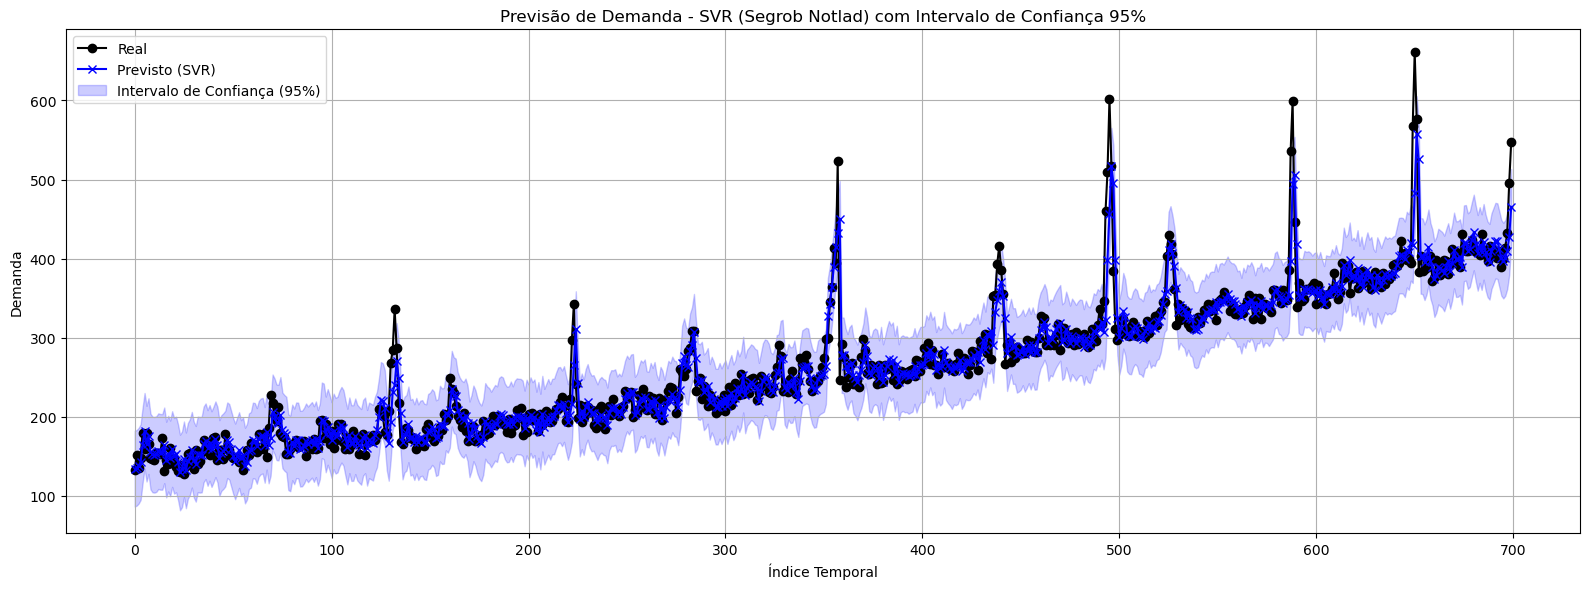

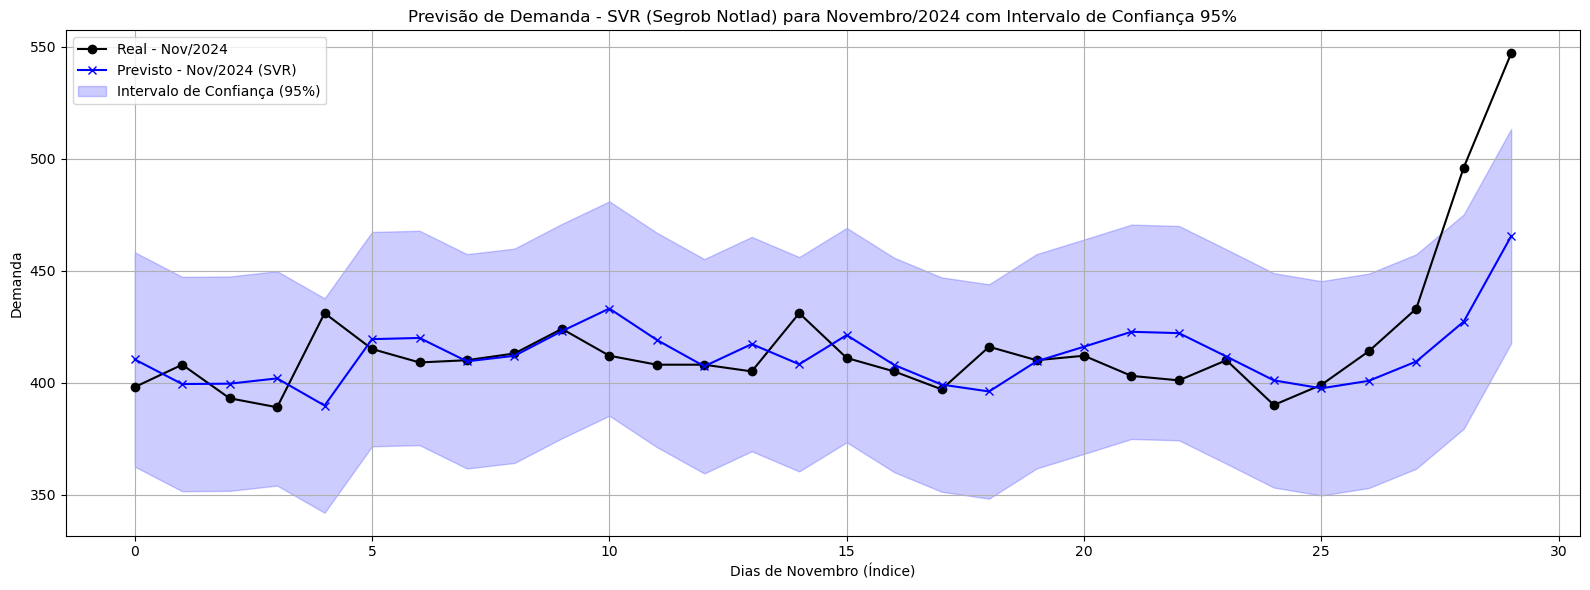

Erro Padrão Absoluto (EPA): 20.30


In [273]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from IPython.display import display

# --- Carregamento dos dados ---
df = pd.read_excel(
    r"C:\Users\andre\OneDrive\Área de Trabalho\Análise Preditiva\Análise Preditiva\Dataset.xlsx",
    sheet_name="2025.04.22"
)
df['datas'] = pd.to_datetime(df['datas'])

# --- Criar variáveis sazonais ---
def cria_dummy_semana(df, data_inicio, data_fim, nome_coluna):
    data_inicio = pd.to_datetime(data_inicio)
    data_fim = pd.to_datetime(data_fim)
    df[nome_coluna] = ((df['datas'] >= data_inicio) & (df['datas'] <= data_fim)).astype(int)

for ano in [2022, 2023, 2024]:
    cria_dummy_semana(df, f'{ano}-12-19', f'{ano}-12-25', f'natal_{ano}')
    cria_dummy_semana(df, f'{ano}-06-06', f'{ano}-06-12', f'dia_namorados_{ano}')
    cria_dummy_semana(df, f'{ano}-10-06', f'{ano}-10-12', f'dia_criancas_{ano}')
cria_dummy_semana(df, '2022-05-01', '2022-05-15', 'dia_maes_2022')
cria_dummy_semana(df, '2023-05-07', '2023-05-21', 'dia_maes_2023')
cria_dummy_semana(df, '2024-05-05', '2024-05-19', 'dia_maes_2024')
cria_dummy_semana(df, '2022-08-07', '2022-08-21', 'dia_pais_2022')
cria_dummy_semana(df, '2023-08-06', '2023-08-20', 'dia_pais_2023')
cria_dummy_semana(df, '2024-08-04', '2024-08-18', 'dia_pais_2024')
cria_dummy_semana(df, '2022-11-18', '2022-11-30', 'black_friday_2022')
cria_dummy_semana(df, '2023-11-17', '2023-11-30', 'black_friday_2023')
cria_dummy_semana(df, '2024-11-15', '2024-11-30', 'black_friday_2024')

# --- Lags e variáveis temporais ---
lags = list(range(1, 8)) + [30, 365]
for lag in lags:
    df[f'lag_{lag}'] = df['vendas'].shift(lag)

df['dia_do_ano'] = df['datas'].dt.dayofyear
df['mes'] = df['datas'].dt.month
df['dia_da_semana'] = df['datas'].dt.dayofweek
df['sin_dia_ano'] = np.sin(2 * np.pi * df['dia_do_ano'] / 365)
df['cos_dia_ano'] = np.cos(2 * np.pi * df['dia_do_ano'] / 365)
df['sin_mes'] = np.sin(2 * np.pi * df['mes'] / 12)
df['cos_mes'] = np.cos(2 * np.pi * df['mes'] / 12)
df['sin_semana'] = np.sin(2 * np.pi * df['dia_da_semana'] / 7)
df['cos_semana'] = np.cos(2 * np.pi * df['dia_da_semana'] / 7)

# --- Seleção de variáveis ---
df = df.dropna().reset_index(drop=True)
lags_cols = [f'lag_{l}' for l in lags]
variaveis_sazonais = [col for col in df.columns if any(x in col for x in ['natal', 'namorados', 'criancas', 'maes', 'pais', 'black_friday'])]
variaveis_temporais = ['sin_dia_ano', 'cos_dia_ano', 'sin_mes', 'cos_mes', 'sin_semana', 'cos_semana']

X = df[variaveis_sazonais + lags_cols + variaveis_temporais]
y = df['vendas']

# --- Separar treino e teste (in-sample) ---
X_train = X
X_test = X
y_train = y
y_test = y

# --- Pipeline com SVR ---
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

param_grid = {
    'svr__C': [1, 10, 100],
    'svr__epsilon': [0.01, 0.1, 0.5],
    'svr__kernel': ['rbf', 'linear'],
    'svr__gamma': ['scale', 'auto']
}

tscv = TimeSeriesSplit(n_splits=5)
grid_search = GridSearchCV(pipeline, param_grid, cv=tscv, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
melhor_modelo = grid_search.best_estimator_

# --- Previsões ---
y_pred = melhor_modelo.predict(X_test)

# --- Métricas ---
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
mad = np.mean(np.abs(y_test - y_pred))

# --- Tabela com melhores hiperparâmetros encontrados ---
melhores_parametros_df = pd.DataFrame([grid_search.best_params_])
melhores_parametros_df.rename(columns={
    'svr__C': 'C',
    'svr__epsilon': 'Epsilon',
    'svr__gamma': 'Gamma',
    'svr__kernel': 'Kernel'
}, inplace=True)

# --- Estilo visual para exibição dos hiperparâmetros ---
def estilo_parametros(df):
    return (
        df.style
        .set_caption("Melhores Hiperparâmetros - SVR")
        .format(None)
        .set_table_styles([
            {"selector": "th", "props": [("text-align", "center")]},
            {"selector": "caption", "props": [("caption-side", "top"), ("font-size", "16px"), ("font-weight", "bold")]}
        ])
        .hide(axis="index")
    )

display(estilo_parametros(melhores_parametros_df))

# --- Tabela com métricas de desempenho ---
metrica_df = pd.DataFrame([{
    'MAE': mae,
    'RMSE': rmse,
    'R²': r2,
    'MAPE (%)': mape,
    'MAD': mad
}])

def estilo_metricas(df):
    return (
        df.style
        .set_caption("Desempenho do Modelo SVR - In-Sample")
        .format({
            'MAE': '{:.2f}',
            'RMSE': '{:.2f}',
            'R²': '{:.4f}',
            'MAPE (%)': '{:.2f}',
            'MAD': '{:.2f}'
        })
        .set_table_styles([
            {"selector": "th", "props": [("text-align", "center")]},
            {"selector": "caption", "props": [("caption-side", "top"), ("font-size", "16px"), ("font-weight", "bold")]}
        ])
        .hide(axis="index")
    )

display(estilo_metricas(metrica_df))



# --- Intervalo de confiança (95%) assumindo normalidade dos resíduos ---
residuos = y_test.values - y_pred
erro_padrao = np.std(residuos)
ic_superior = y_pred + 1.96 * erro_padrao
ic_inferior = y_pred - 1.96 * erro_padrao

plt.figure(figsize=(16, 6))
plt.plot(y_test.values, label='Real', marker='o', color='black')
plt.plot(y_pred, label='Previsto (SVR)', marker='x', color='blue')
plt.fill_between(range(len(y_pred)), ic_inferior, ic_superior, color='blue', alpha=0.2, label='Intervalo de Confiança (95%)')
plt.title('Previsão de Demanda - SVR (Segrob Notlad) com Intervalo de Confiança 95%')
plt.xlabel('Índice Temporal')
plt.ylabel('Demanda')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



# --- Intervalo de confiança (95%) assumindo normalidade dos resíduos ---
residuos = y_test.values - y_pred
erro_padrao = np.std(residuos)

# --- Selecionar apenas os dados de novembro de 2024 ---
novembro_mask = (df['datas'] >= '2024-11-01') & (df['datas'] <= '2024-11-30')
y_real_nov = y_test[novembro_mask]
y_pred_nov = y_pred[novembro_mask]

ic_superior_nov = y_pred_nov + 1.96 * erro_padrao
ic_inferior_nov = y_pred_nov - 1.96 * erro_padrao

# --- Gráfico somente para novembro com intervalo de confiança ---
plt.figure(figsize=(16, 6))
plt.plot(y_real_nov.values, label='Real - Nov/2024', marker='o', color='black')
plt.plot(y_pred_nov, label='Previsto - Nov/2024 (SVR)', marker='x', color='blue')
plt.fill_between(range(len(y_pred_nov)), ic_inferior_nov, ic_superior_nov, color='blue', alpha=0.2, label='Intervalo de Confiança (95%)')
plt.title('Previsão de Demanda - SVR (Segrob Notlad) para Novembro/2024 com Intervalo de Confiança 95%')
plt.xlabel('Dias de Novembro (Índice)')
plt.ylabel('Demanda')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Erro Padrão Absoluto (Standard Deviation of Absolute Errors) ---
erro_absoluto = np.abs(y_test.values - y_pred)
erro_padrao_absoluto = np.std(erro_absoluto)

print(f"Erro Padrão Absoluto (EPA): {erro_padrao_absoluto:.2f}")


Max_depth,Max_features,Min_samples_leaf,Min_samples_split,N_estimators
10,sqrt,2,5,100


MAE,RMSE,R²,MAPE (%),MAD
8.81,15.86,0.9642,3.30,8.81


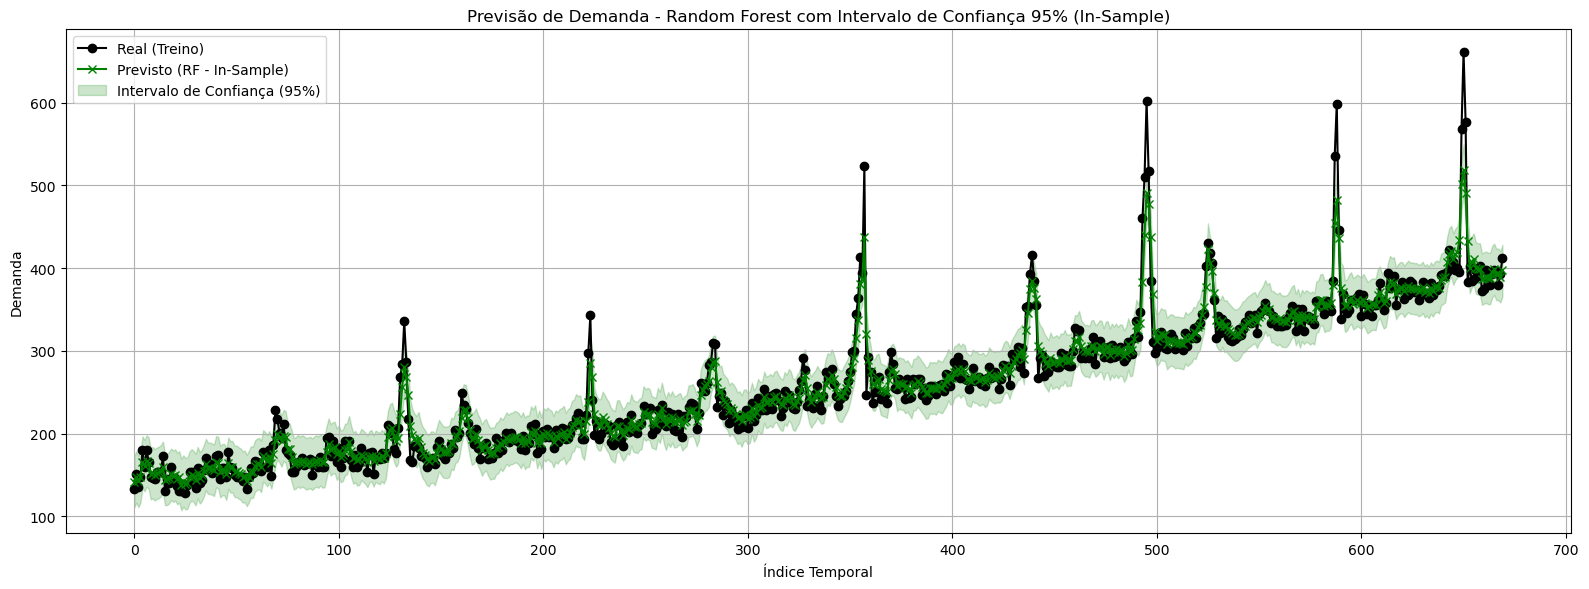

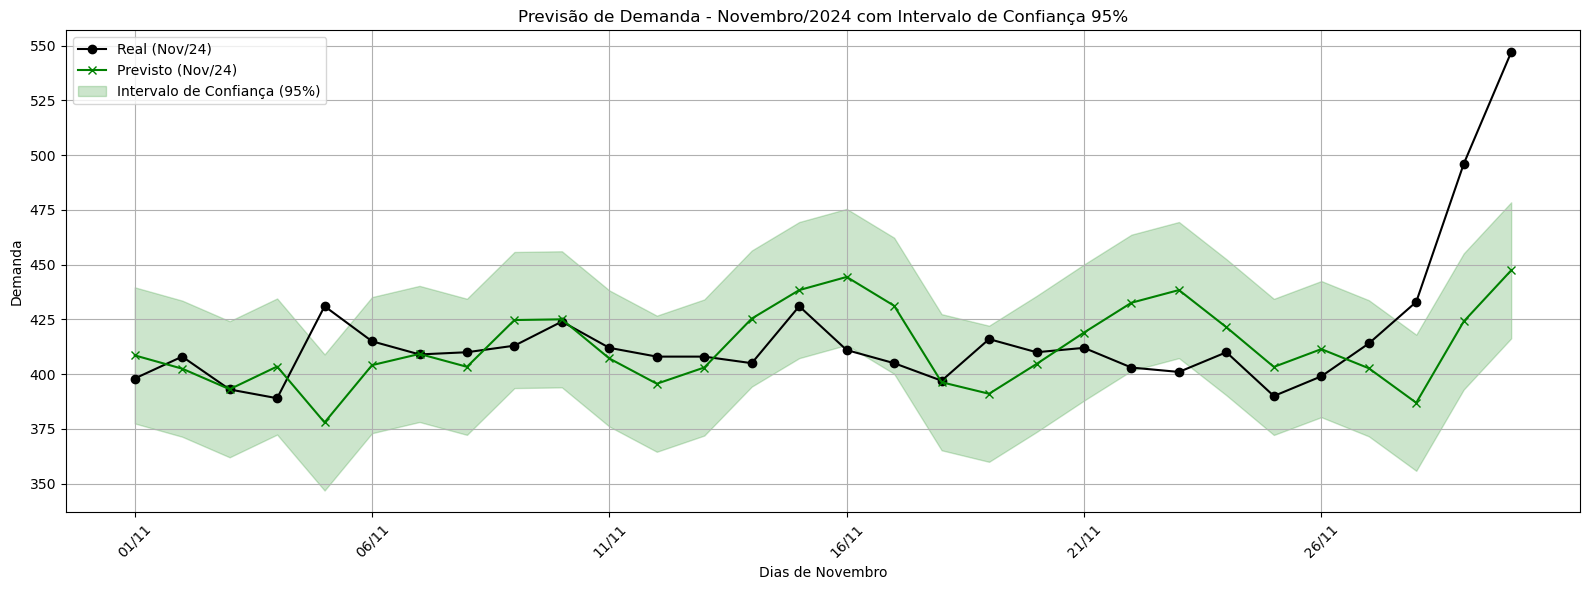

Erro Padrão Absoluto (EPA): 13.19


In [274]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
)
import matplotlib.pyplot as plt
from IPython.display import display

# --- Leitura dos dados ---
df = pd.read_excel(
    r"C:\Users\andre\OneDrive\Área de Trabalho\Análise Preditiva\Análise Preditiva\Dataset.xlsx",
    sheet_name="2025.04.22"
)
df['datas'] = pd.to_datetime(df['datas'])

# --- Variáveis sazonais (feriados e datas comemorativas) ---
def cria_dummy_semana(df, data_inicio, data_fim, nome_coluna):
    data_inicio = pd.to_datetime(data_inicio)
    data_fim = pd.to_datetime(data_fim)
    df[nome_coluna] = ((df['datas'] >= data_inicio) & (df['datas'] <= data_fim)).astype(int)

for ano in [2022, 2023, 2024]:
    cria_dummy_semana(df, f'{ano}-12-19', f'{ano}-12-25', f'natal_{ano}')
    cria_dummy_semana(df, f'{ano}-06-06', f'{ano}-06-12', f'dia_namorados_{ano}')
    cria_dummy_semana(df, f'{ano}-10-06', f'{ano}-10-12', f'dia_criancas_{ano}')
cria_dummy_semana(df, '2022-05-01', '2022-05-15', 'dia_maes_2022')
cria_dummy_semana(df, '2023-05-07', '2023-05-21', 'dia_maes_2023')
cria_dummy_semana(df, '2024-05-05', '2024-05-19', 'dia_maes_2024')
cria_dummy_semana(df, '2022-08-07', '2022-08-21', 'dia_pais_2022')
cria_dummy_semana(df, '2023-08-06', '2023-08-20', 'dia_pais_2023')
cria_dummy_semana(df, '2024-08-04', '2024-08-18', 'dia_pais_2024')
cria_dummy_semana(df, '2022-11-18', '2022-11-30', 'black_friday_2022')
cria_dummy_semana(df, '2023-11-17', '2023-11-30', 'black_friday_2023')
cria_dummy_semana(df, '2024-11-15', '2024-11-30', 'black_friday_2024')

# --- Lags e encodings temporais cíclicos ---
lags = list(range(1, 8)) + [30, 365]
for lag in lags:
    df[f'lag_{lag}'] = df['vendas'].shift(lag)

df['dia_do_ano'] = df['datas'].dt.dayofyear
df['mes'] = df['datas'].dt.month
df['dia_da_semana'] = df['datas'].dt.dayofweek
df['sin_dia_ano'] = np.sin(2 * np.pi * df['dia_do_ano'] / 365)
df['cos_dia_ano'] = np.cos(2 * np.pi * df['dia_do_ano'] / 365)
df['sin_mes'] = np.sin(2 * np.pi * df['mes'] / 12)
df['cos_mes'] = np.cos(2 * np.pi * df['mes'] / 12)
df['sin_semana'] = np.sin(2 * np.pi * df['dia_da_semana'] / 7)
df['cos_semana'] = np.cos(2 * np.pi * df['dia_da_semana'] / 7)

# --- Seleção de variáveis e remoção de NaN ---
df = df.dropna().reset_index(drop=True)
lags_cols = [f'lag_{l}' for l in lags]
variaveis_sazonais = [col for col in df.columns if any(x in col for x in ['natal', 'namorados', 'criancas', 'maes', 'pais', 'black_friday'])]
variaveis_temporais = ['sin_dia_ano', 'cos_dia_ano', 'sin_mes', 'cos_mes', 'sin_semana', 'cos_semana']
X = df[variaveis_sazonais + lags_cols + variaveis_temporais]
y = df['vendas']

# --- Separar treino e teste ---
X_train = X[df['datas'] <= '2024-10-31']
X_test = X[(df['datas'] >= '2024-11-01') & (df['datas'] <= '2024-11-30')]
y_train = y[df['datas'] <= '2024-10-31']
y_test = y[(df['datas'] >= '2024-11-01') & (df['datas'] <= '2024-11-30')]

# --- Pipeline com RandomForest ---
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

param_grid = {
    'rf__n_estimators': [100, 300],
    'rf__max_depth': [10, 20, None],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 2],
    'rf__max_features': ['sqrt', 'log2']
}

tscv = TimeSeriesSplit(n_splits=5)
grid = GridSearchCV(pipeline, param_grid, cv=tscv, scoring='neg_mean_absolute_error', n_jobs=-1)
grid.fit(X_train, y_train)

# --- Previsões ---
# --- Previsões (in-sample) ---
y_pred = grid.predict(X_train)

# --- Métricas (in-sample) ---
mae = mean_absolute_error(y_train, y_pred)
rmse = mean_squared_error(y_train, y_pred, squared=False)
r2 = r2_score(y_train, y_pred)
mape = mean_absolute_percentage_error(y_train, y_pred) * 100
mad = np.mean(np.abs(y_train - y_pred))

# --- Exibir melhores hiperparâmetros ---
melhores_parametros_df = pd.DataFrame([grid.best_params_])
melhores_parametros_df.rename(columns=lambda x: x.replace('rf__', '').capitalize(), inplace=True)

display(estilo_parametros(melhores_parametros_df))

# --- Tabela de métricas (in-sample) ---
metricas_df = pd.DataFrame([{
    'MAE': mae, 'RMSE': rmse, 'R²': r2, 'MAPE (%)': mape, 'MAD': mad
}])

def estilo_metricas(df):
    return (
        df.style
        .set_caption("Desempenho do Modelo Random Forest - In-Sample (Treino)")
        .format({
            'MAE': '{:.2f}',
            'RMSE': '{:.2f}',
            'R²': '{:.4f}',
            'MAPE (%)': '{:.2f}',
            'MAD': '{:.2f}'
        })
        .set_table_styles([
            {"selector": "th", "props": [("text-align", "center")]},
            {"selector": "caption", "props": [("caption-side", "top"), ("font-size", "16px"), ("font-weight", "bold")]}
        ])
        .hide(axis="index")
    )

display(estilo_metricas(metricas_df))


# --- Intervalo de confiança (95%) (in-sample) ---
residuos = y_train.values - y_pred
erro_padrao = np.std(residuos)
ic_superior = y_pred + 1.96 * erro_padrao
ic_inferior = y_pred - 1.96 * erro_padrao

plt.figure(figsize=(16, 6))
plt.plot(y_train.values, label='Real (Treino)', marker='o', color='black')
plt.plot(y_pred, label='Previsto (RF - In-Sample)', marker='x', color='green')
plt.fill_between(range(len(y_pred)), ic_inferior, ic_superior, color='green', alpha=0.2, label='Intervalo de Confiança (95%)')
plt.title('Previsão de Demanda - Random Forest com Intervalo de Confiança 95% (In-Sample)')
plt.xlabel('Índice Temporal')
plt.ylabel('Demanda')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# --- Previsão para novembro/2024 (out-of-sample, usando modelo já treinado) ---
X_novembro = X[(df['datas'] >= '2024-11-01') & (df['datas'] <= '2024-11-30')]
y_novembro_real = y[(df['datas'] >= '2024-11-01') & (df['datas'] <= '2024-11-30')]
y_novembro_pred = grid.predict(X_novembro)

# --- Intervalo de confiança para novembro/2024 ---
residuos_in_sample = y_train.values - y_pred
erro_padrao_in_sample = np.std(residuos_in_sample)
ic_sup_nov = y_novembro_pred + 1.96 * erro_padrao_in_sample
ic_inf_nov = y_novembro_pred - 1.96 * erro_padrao_in_sample

# --- Gráfico somente para novembro com IC ---
plt.figure(figsize=(16, 6))
plt.plot(y_novembro_real.values, label='Real (Nov/24)', marker='o', color='black')
plt.plot(y_novembro_pred, label='Previsto (Nov/24)', marker='x', color='green')
plt.fill_between(range(len(y_novembro_pred)), ic_inf_nov, ic_sup_nov, color='green', alpha=0.2, label='Intervalo de Confiança (95%)')
plt.title('Previsão de Demanda - Novembro/2024 com Intervalo de Confiança 95%')
plt.xlabel('Dias de Novembro')
plt.ylabel('Demanda')
tick_indices = list(range(0, len(y_novembro_real), 5))
tick_labels = df.loc[y_novembro_real.index[tick_indices], 'datas'].dt.strftime('%d/%m')
plt.xticks(ticks=tick_indices, labels=tick_labels, rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Erro Padrão Absoluto ---
erro_padrao_absoluto = np.std(np.abs(y_train.values - y_pred))
print(f"Erro Padrão Absoluto (EPA): {erro_padrao_absoluto:.2f}")


